In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_excel(r"C:\Users\YASH SHARMA\OneDrive\Desktop\data sets\bank.xlsx")

In [3]:
df.shape

(11162, 17)

In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# Eda

## univariate

In [6]:
def univariate_cat(data, x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"Count"}, inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"percentage"}, inplace=True)
    f2["percentage"]=(f2["percentage"]*100).round(2).astype(str)+"%"
    ff=pd.concat([f1, f2], axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f"Value count and %\n", ff)
    plt.figure(figsize=(11,7))
    ax=sns.countplot(data=data, x=x)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    
    plt.show()

In [7]:
df.dtypes[df.dtypes=="object"].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
Value count and %
                Count percentage
management      2566     22.99%
blue-collar     1944     17.42%
technician      1823     16.33%
admin.          1334     11.95%
services         923      8.27%
retired          778      6.97%
self-employed    405      3.63%
student          360      3.23%
unemployed       357       3.2%
entrepreneur     328      2.94%
housemaid        274      2.45%
unknown           70      0.63%


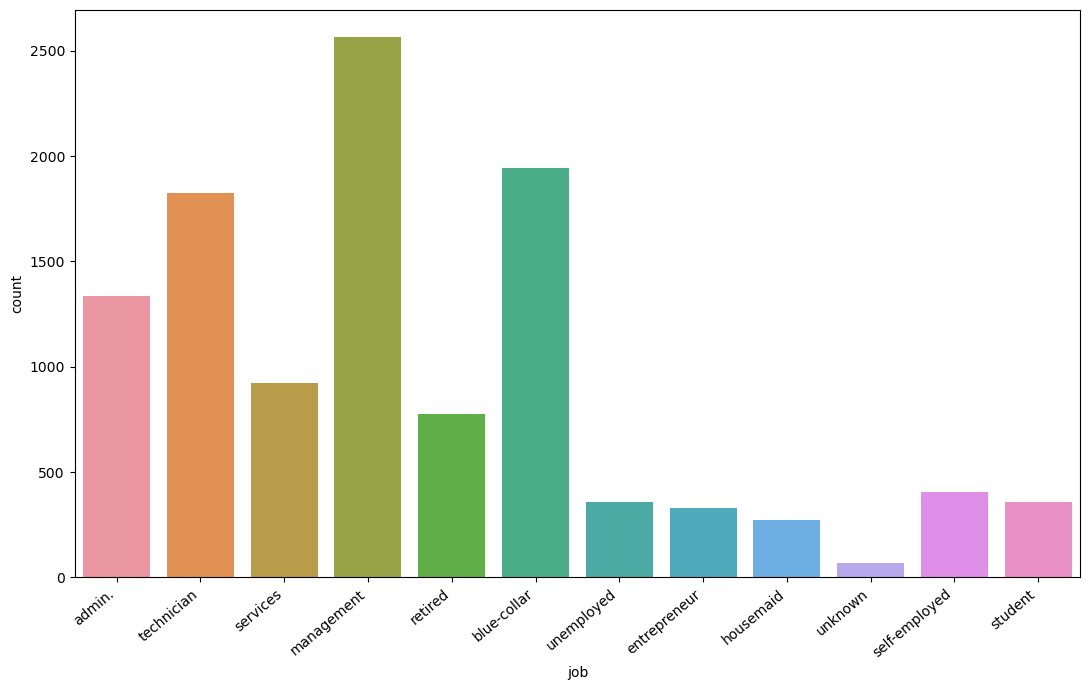

In [8]:
univariate_cat(df,"job")

In [9]:
df["job"]=df["job"].replace(["management", "admin."], "White-collar")

df["job"]=df["job"].replace(["services", "housemaid"], "Pink-collar")

df["job"]=df["job"].replace(["retired", "student", "unemployed", 
                                   "unknown"], "Others")
df["job"]=df["job"].replace(["self-employed", "entrepreneur"], "self-depend")

Total missing values : 0

Total count of unique categories: 6

Unique categories :
['White-collar', 'technician', 'Pink-collar', 'Others', 'blue-collar', 'self-depend']
Value count and %
               Count percentage
White-collar   3900     34.94%
blue-collar    1944     17.42%
technician     1823     16.33%
Others         1565     14.02%
Pink-collar    1197     10.72%
self-depend     733      6.57%


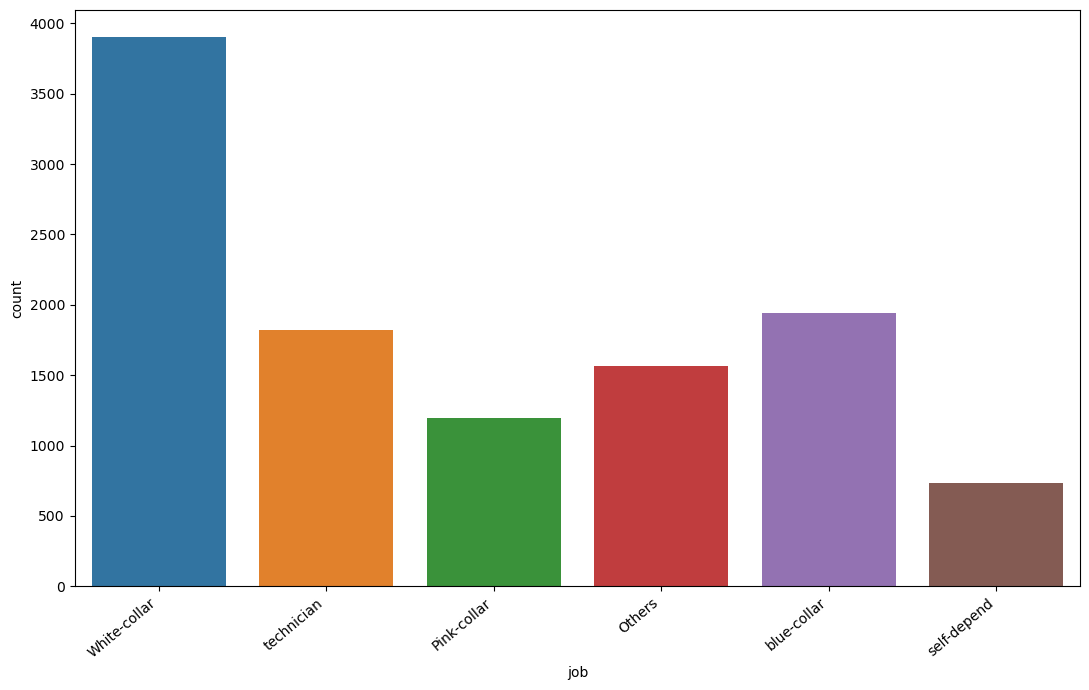

In [10]:
univariate_cat(df,"job")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['married', 'single', 'divorced']
Value count and %
           Count percentage
married    6351      56.9%
single     3518     31.52%
divorced   1293     11.58%


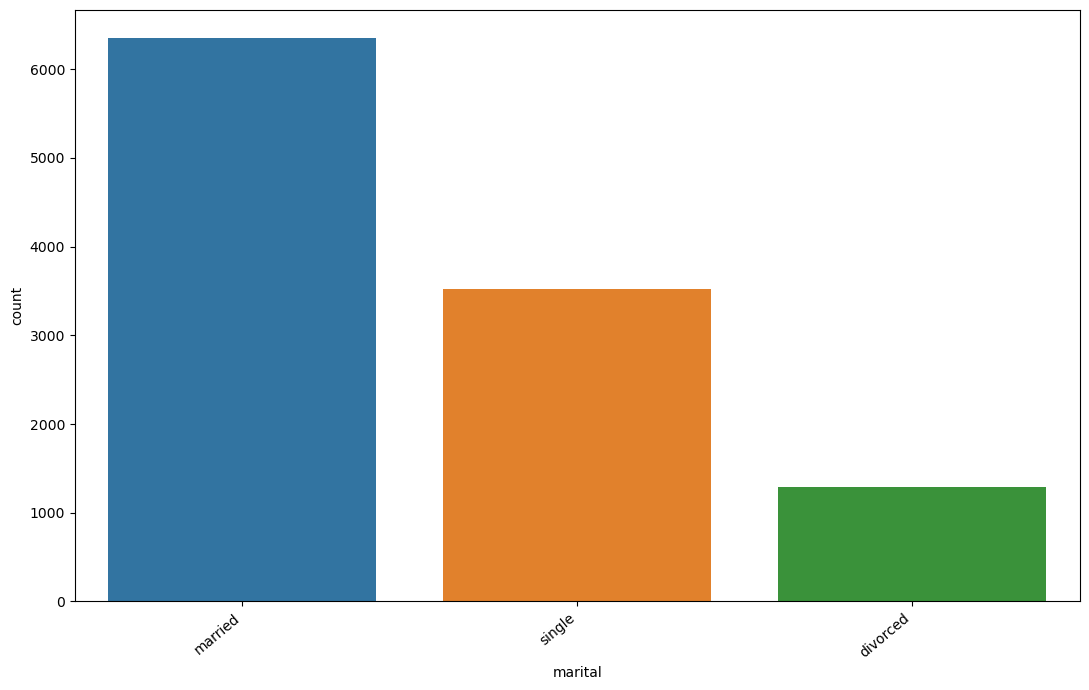

In [11]:
univariate_cat(df,"marital")

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['secondary', 'tertiary', 'primary', 'unknown']
Value count and %
            Count percentage
secondary   5476     49.06%
tertiary    3689     33.05%
primary     1500     13.44%
unknown      497      4.45%


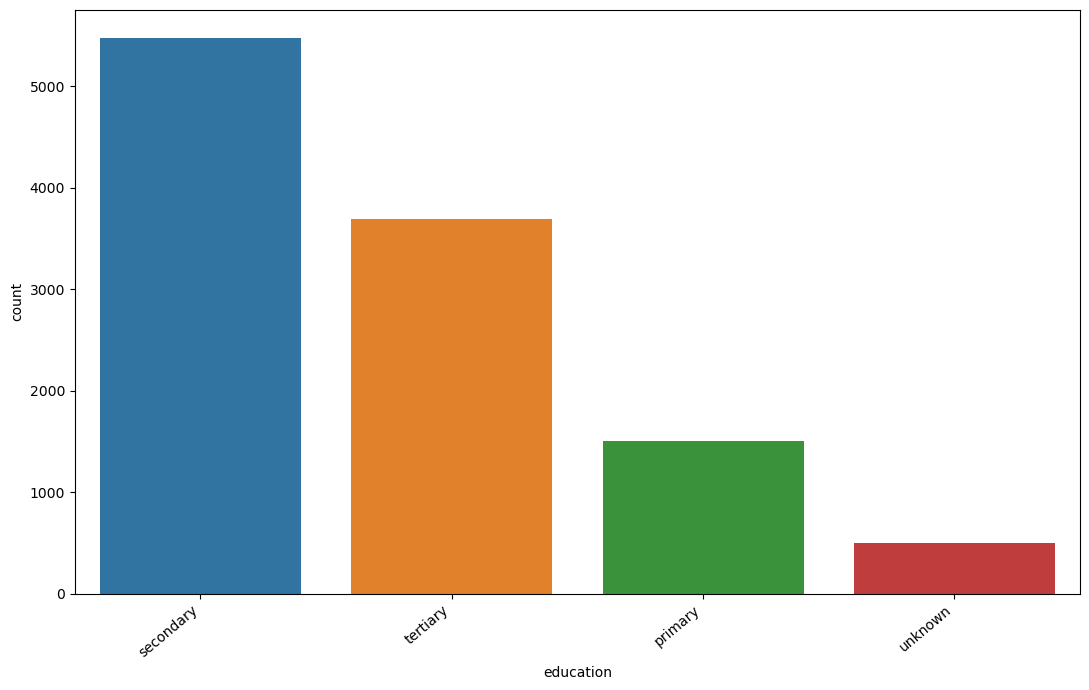

In [12]:
univariate_cat(df,"education")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
      Count percentage
no   10994     98.49%
yes    168      1.51%


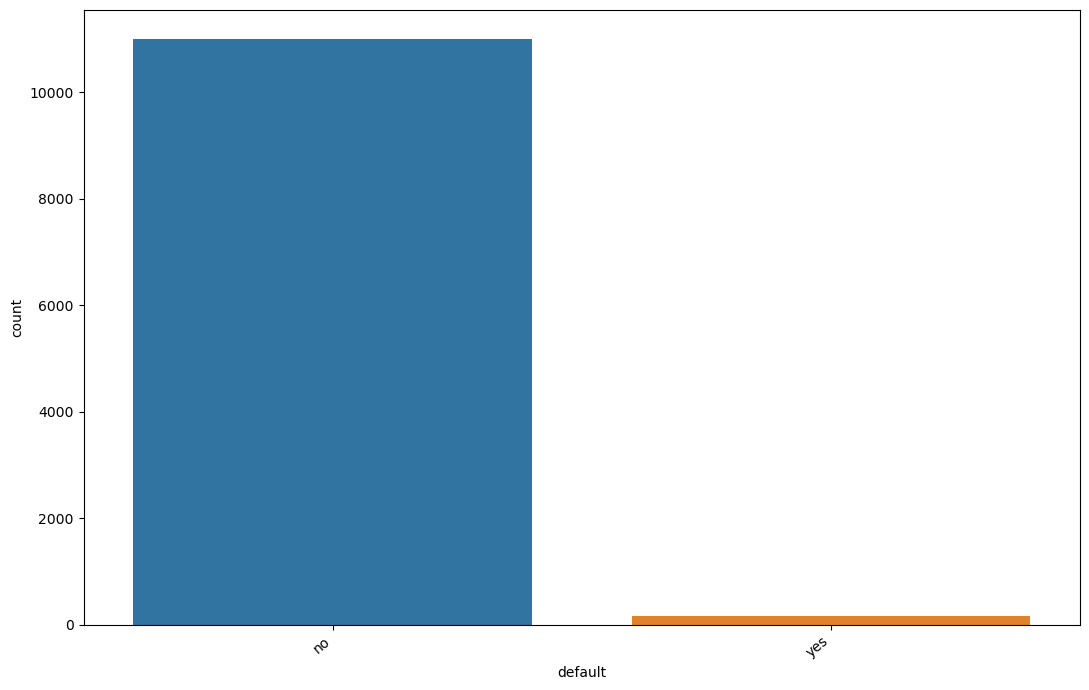

In [13]:
univariate_cat(df,"default")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
      Count percentage
no    5881     52.69%
yes   5281     47.31%


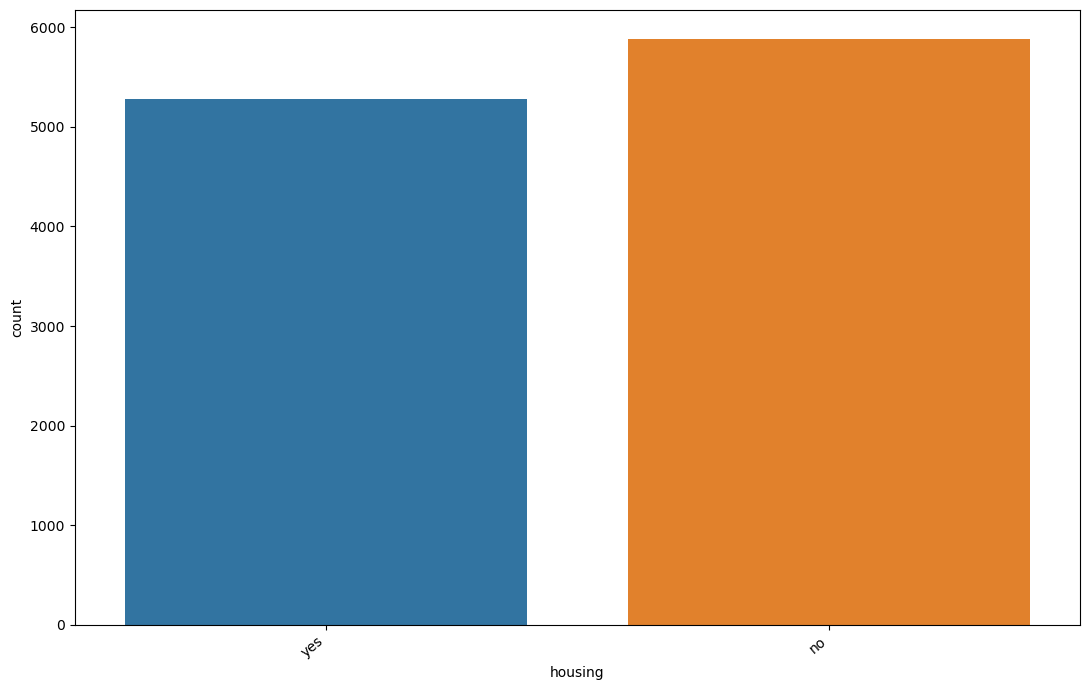

In [14]:
univariate_cat(df,"housing")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
      Count percentage
no    9702     86.92%
yes   1460     13.08%


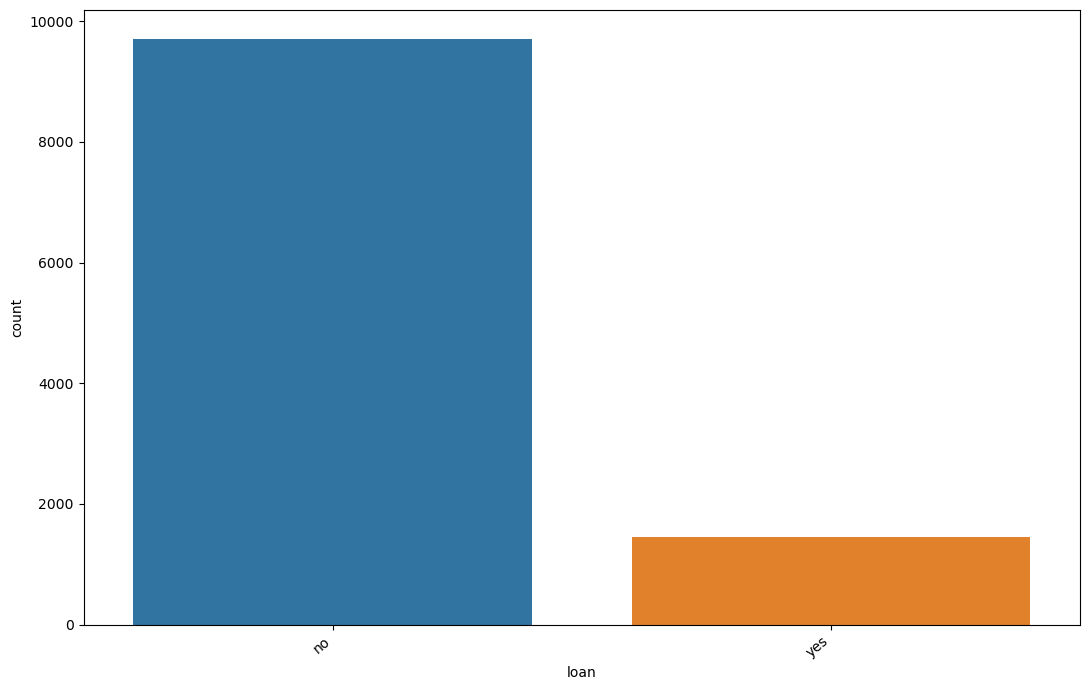

In [15]:
univariate_cat(df,"loan")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['unknown', 'cellular', 'telephone']
Value count and %
            Count percentage
cellular    8042     72.05%
unknown     2346     21.02%
telephone    774      6.93%


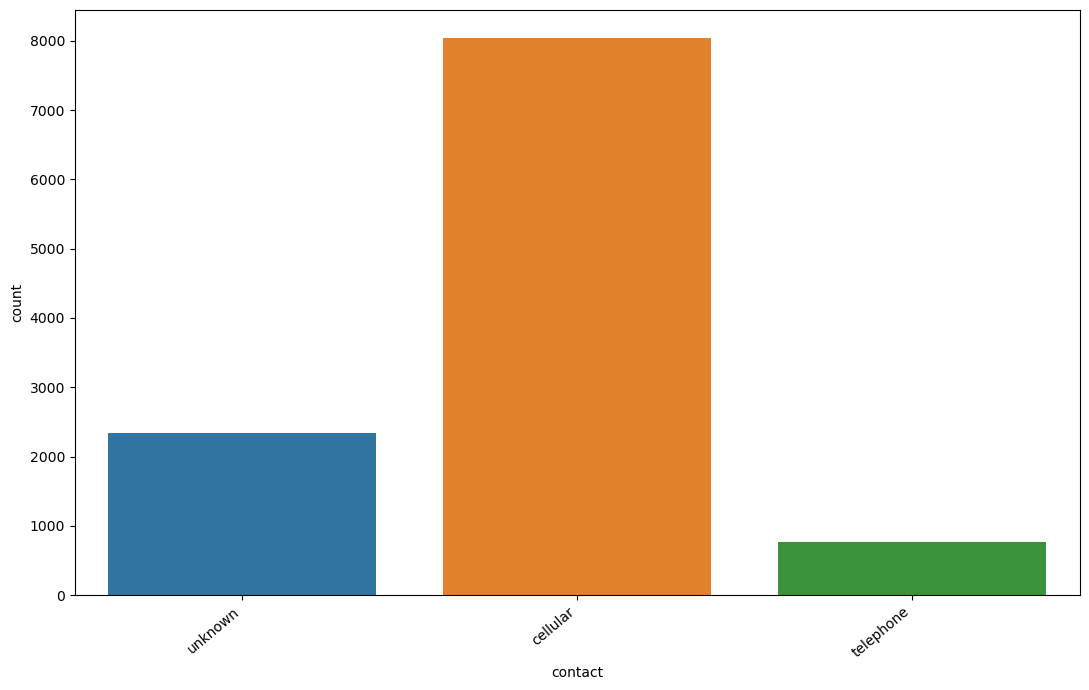

In [16]:
univariate_cat(df,"contact")

In [17]:
df.drop(columns=["contact"],inplace=True)

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
Value count and %
      Count percentage
may   2824      25.3%
aug   1519     13.61%
jul   1514     13.56%
jun   1222     10.95%
nov    943      8.45%
apr    923      8.27%
feb    776      6.95%
oct    392      3.51%
jan    344      3.08%
sep    319      2.86%
mar    276      2.47%
dec    110      0.99%


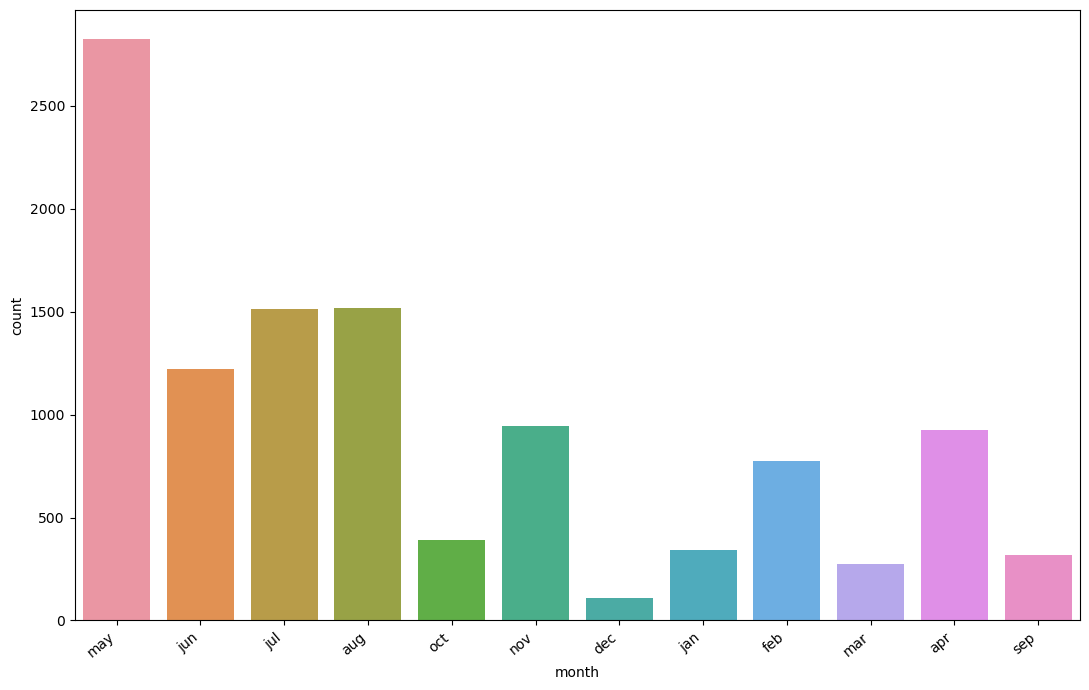

In [18]:
univariate_cat(df,"month")

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['unknown', 'other', 'failure', 'success']
Value count and %
          Count percentage
unknown   8326     74.59%
failure   1228      11.0%
success   1071       9.6%
other      537      4.81%


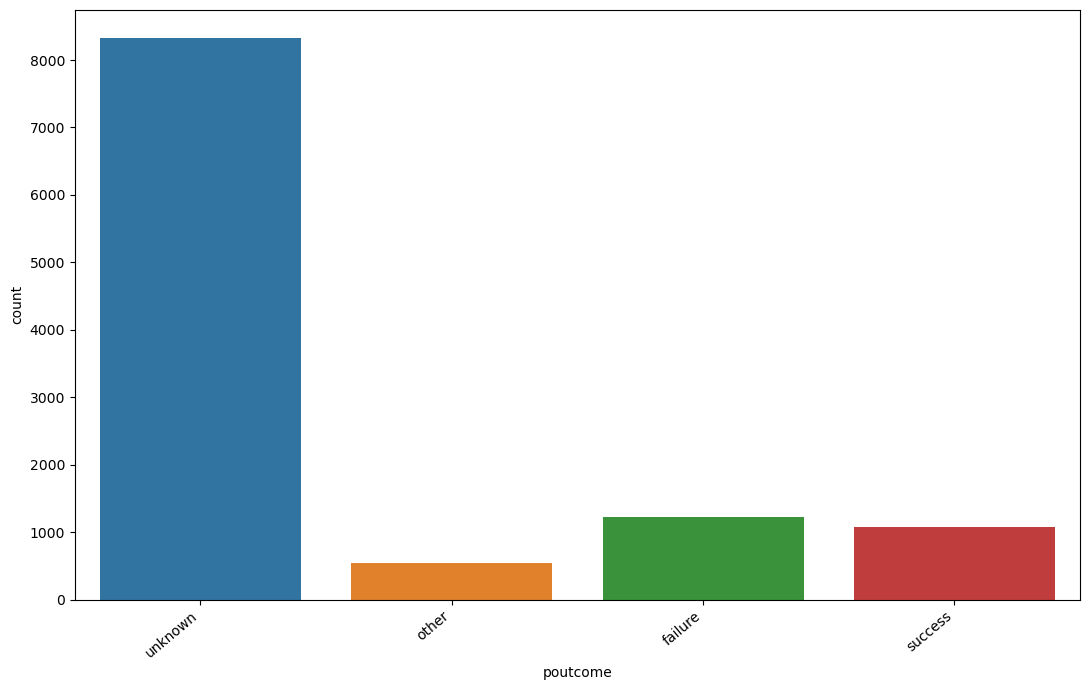

In [19]:
univariate_cat(df,"poutcome")

In [20]:
df["poutcome"]=df["poutcome"].replace(["unknown","other"],"other")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['other', 'failure', 'success']
Value count and %
          Count percentage
other     8863      79.4%
failure   1228      11.0%
success   1071       9.6%


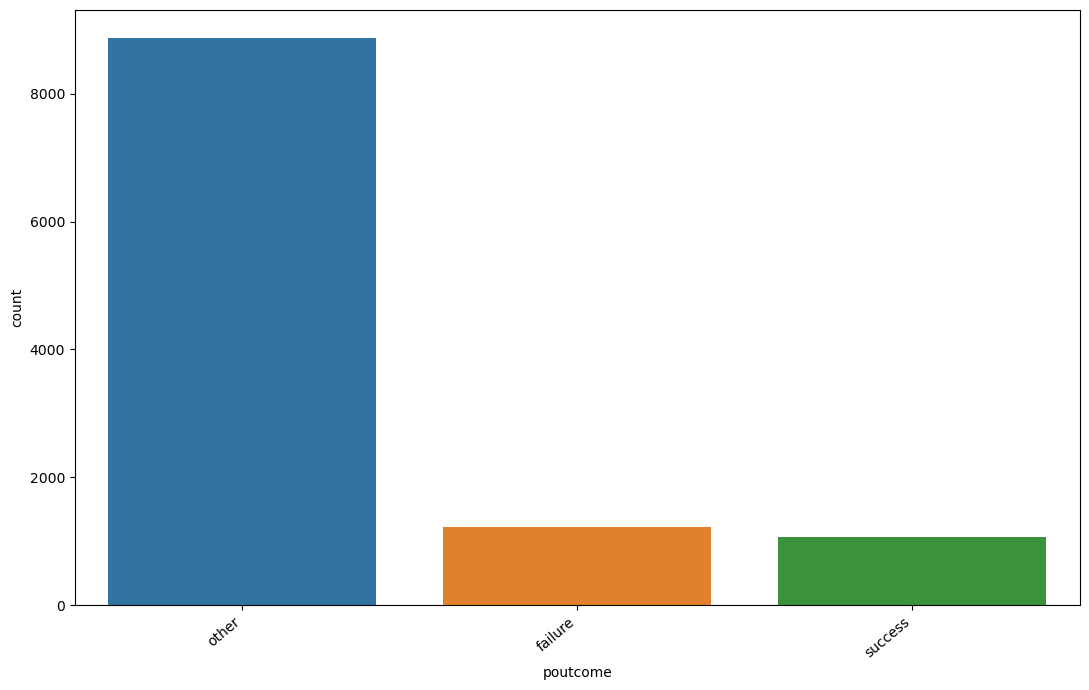

In [21]:
univariate_cat(df,"poutcome")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
      Count percentage
no    5873     52.62%
yes   5289     47.38%


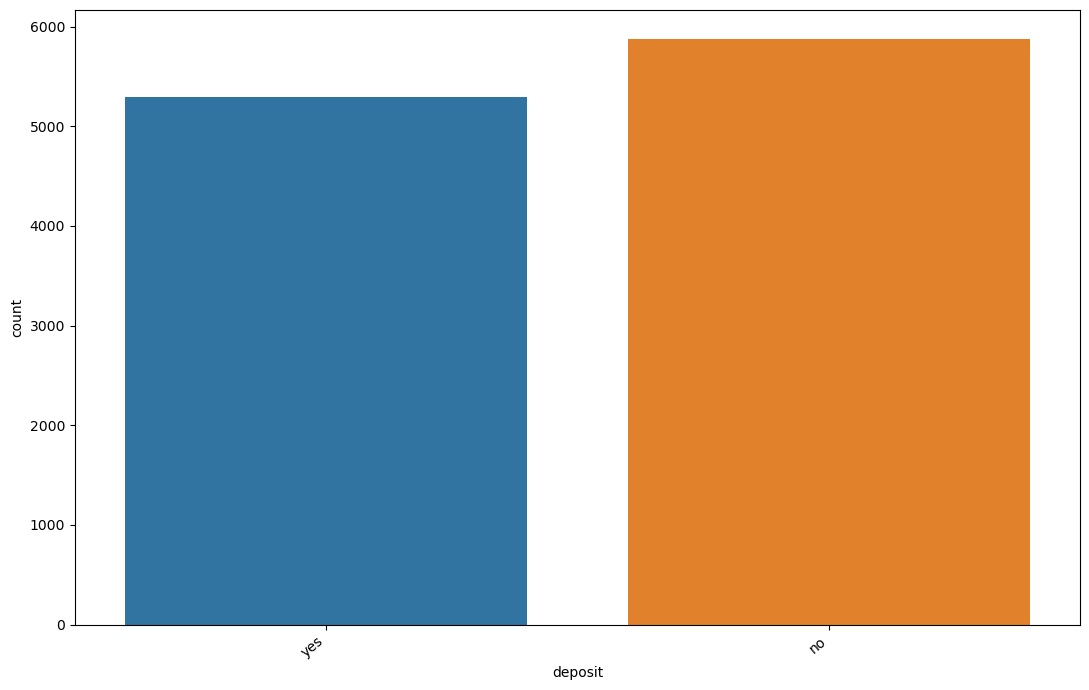

In [22]:
univariate_cat(df,"deposit")

In [23]:
df["deposit"]=df["deposit"].map({"yes":1,"no":0})

In [24]:
df["deposit"].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

## univariate analysis on numerical

In [25]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

In [26]:
df.dtypes[df.dtypes!="object"].index

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

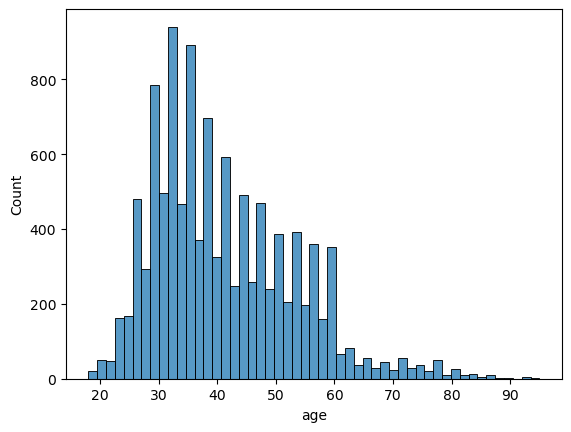

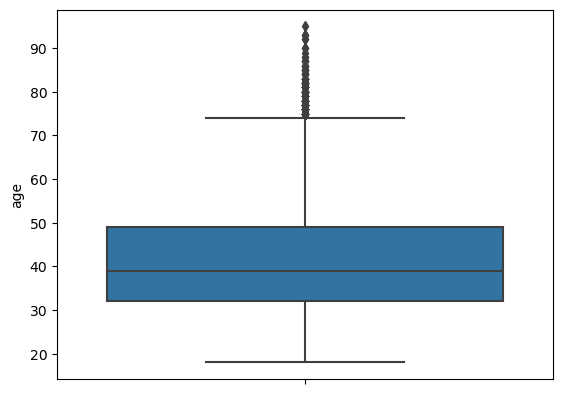

{'missing': 0,
 'min': 18,
 'max': 95,
 'mean': 41.23,
 'var': 141.93,
 'std': 11.91,
 'range': 77,
 'q1': 32.0,
 'q2': 39.0,
 'q3': 49.0,
 'skewness': 0.86,
 'kurtosis': 0.62}

In [27]:
univariate_num(df,"age")

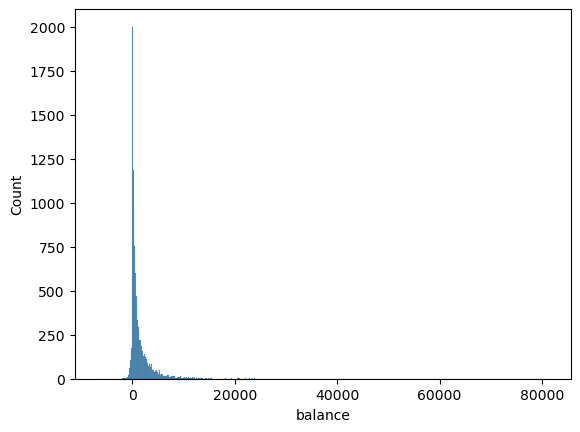

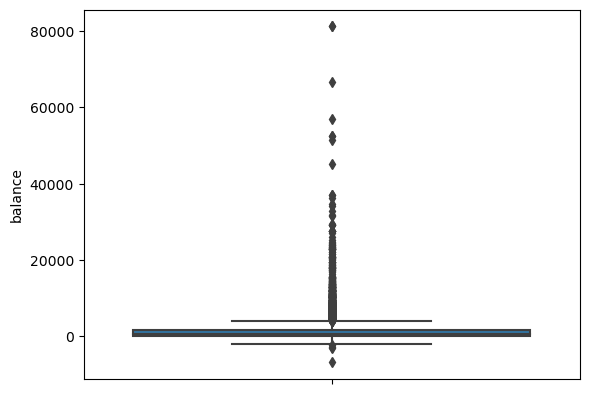

{'missing': 0,
 'min': -6847,
 'max': 81204,
 'mean': 1528.54,
 'var': 10403291.12,
 'std': 3225.41,
 'range': 88051,
 'q1': 122.0,
 'q2': 550.0,
 'q3': 1708.0,
 'skewness': 8.22,
 'kurtosis': 126.86}

In [28]:
univariate_num(df,"balance")

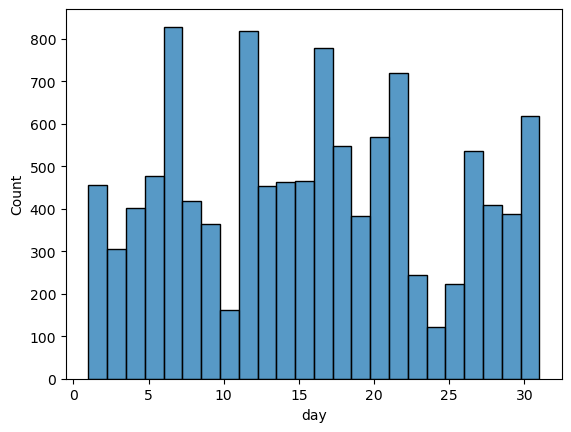

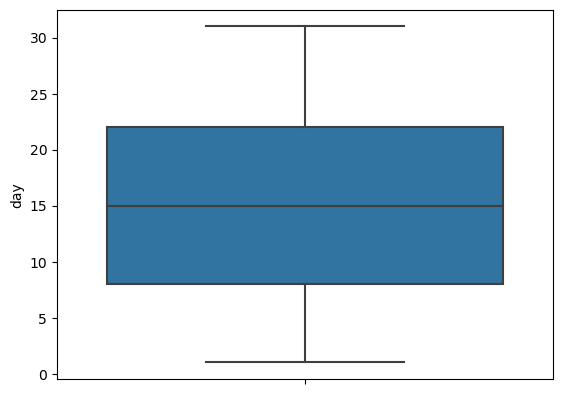

{'missing': 0,
 'min': 1,
 'max': 31,
 'mean': 15.66,
 'var': 70.91,
 'std': 8.42,
 'range': 30,
 'q1': 8.0,
 'q2': 15.0,
 'q3': 22.0,
 'skewness': 0.11,
 'kurtosis': -1.06}

In [29]:
univariate_num(df,"day")

In [30]:
df.drop(columns=["day"],inplace=True)

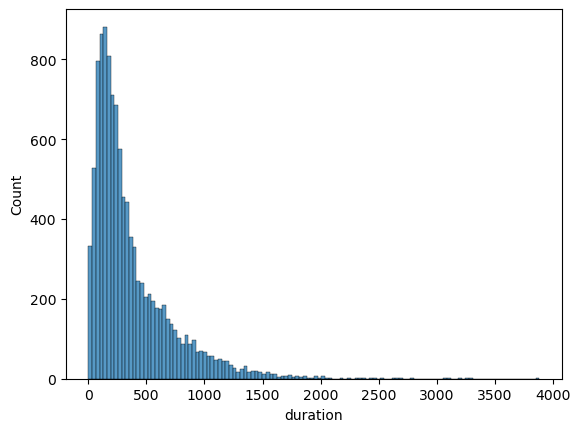

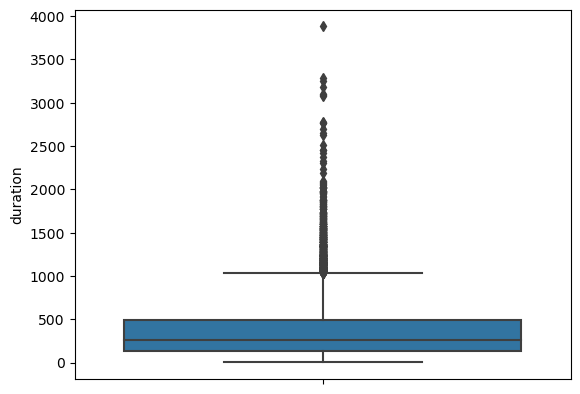

{'missing': 0,
 'min': 2,
 'max': 3881,
 'mean': 371.99,
 'var': 120498.12,
 'std': 347.13,
 'range': 3879,
 'q1': 138.0,
 'q2': 255.0,
 'q3': 496.0,
 'skewness': 2.14,
 'kurtosis': 7.3}

In [31]:
univariate_num(df,"duration")

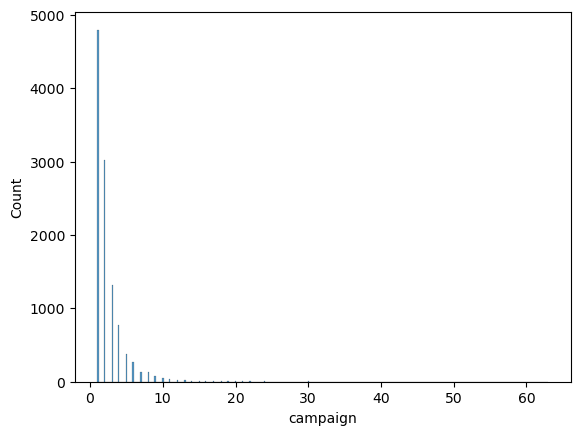

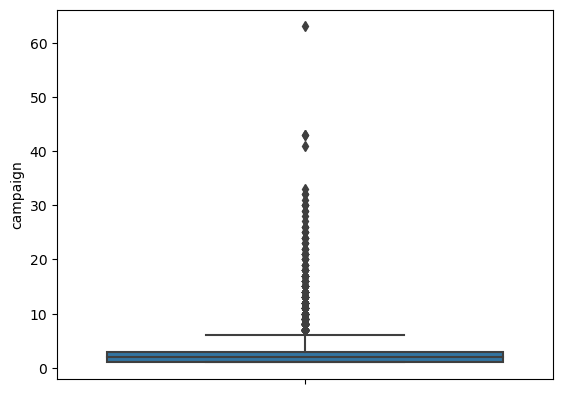

{'missing': 0,
 'min': 1,
 'max': 63,
 'mean': 2.51,
 'var': 7.41,
 'std': 2.72,
 'range': 62,
 'q1': 1.0,
 'q2': 2.0,
 'q3': 3.0,
 'skewness': 5.55,
 'kurtosis': 57.39}

In [32]:
univariate_num(df,"campaign")

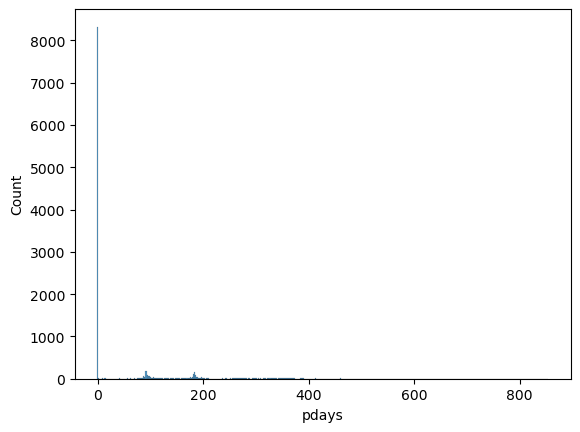

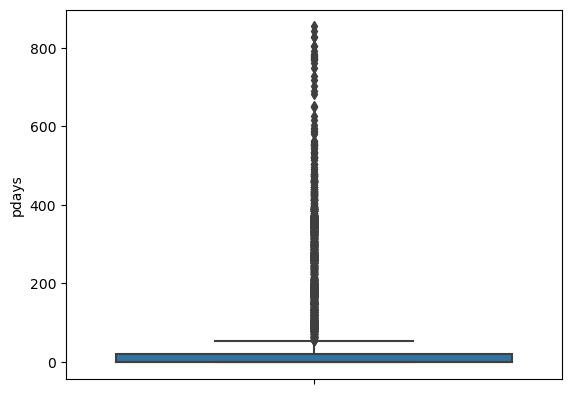

{'missing': 0,
 'min': -1,
 'max': 854,
 'mean': 51.33,
 'var': 11828.36,
 'std': 108.76,
 'range': 855,
 'q1': -1.0,
 'q2': -1.0,
 'q3': 20.75,
 'skewness': 2.45,
 'kurtosis': 6.84}

In [33]:
univariate_num(df,"pdays")

In [34]:
df["pdays"].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

In [35]:
df.loc[df["pdays"]==-1,"pdays"]=999
df["recent_pdays"]=1/df["pdays"]
df.drop(columns=["pdays"], inplace=True) 

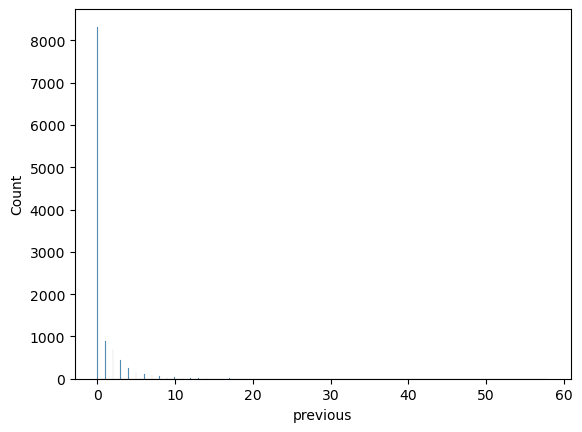

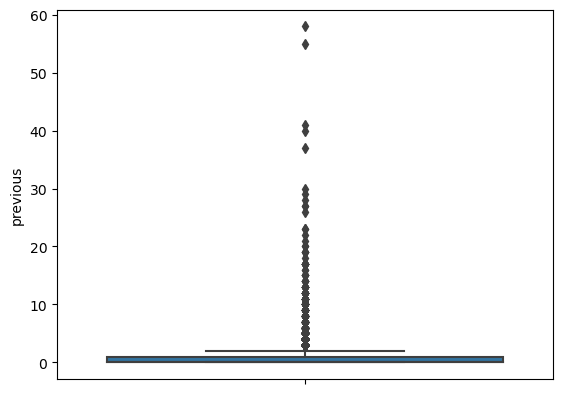

{'missing': 0,
 'min': 0,
 'max': 58,
 'mean': 0.83,
 'var': 5.25,
 'std': 2.29,
 'range': 58,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 1.0,
 'skewness': 7.34,
 'kurtosis': 106.2}

In [36]:
univariate_num(data=df, x="previous")

## bivariate analysis

In [37]:
pd.crosstab(df["job"], df["deposit"])

deposit          0     1
job                     
Others         544  1021
Pink-collar    719   478
White-collar  1968  1932
blue-collar   1236   708
self-depend    423   310
technician     983   840

In [38]:
pd.crosstab(df["job"], df["deposit"],normalize="index")

deposit              0         1
job                             
Others        0.347604  0.652396
Pink-collar   0.600668  0.399332
White-collar  0.504615  0.495385
blue-collar   0.635802  0.364198
self-depend   0.577080  0.422920
technician    0.539221  0.460779

In [39]:
df.dtypes[df.dtypes=="object"].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'poutcome'],
      dtype='object')

In [40]:
pd.crosstab(df["marital"], df["deposit"],normalize="index")

deposit          0         1
marital                     
divorced  0.518948  0.481052
married   0.566210  0.433790
single    0.456509  0.543491

In [41]:
pd.crosstab(df["education"], df["deposit"],normalize="index")

deposit           0         1
education                    
primary    0.606000  0.394000
secondary  0.552593  0.447407
tertiary   0.458932  0.541068
unknown    0.492958  0.507042

In [42]:
pd.crosstab(df["default"], df["deposit"],normalize="index")

deposit         0         1
default                    
no       0.523649  0.476351
yes      0.690476  0.309524

In [43]:
pd.crosstab(df["housing"], df["deposit"],normalize="index")

deposit         0         1
housing                    
no       0.429689  0.570311
yes      0.633592  0.366408

In [44]:
pd.crosstab(df["loan"], df["deposit"],normalize="index")

deposit         0         1
loan                       
no       0.504741  0.495259
yes      0.668493  0.331507

In [45]:
pd.crosstab(df["month"], df["deposit"],normalize="index")

deposit         0         1
month                      
apr      0.374865  0.625135
aug      0.547070  0.452930
dec      0.090909  0.909091
feb      0.431701  0.568299
jan      0.587209  0.412791
jul      0.585865  0.414135
jun      0.553191  0.446809
mar      0.101449  0.898551
may      0.672450  0.327550
nov      0.572641  0.427359
oct      0.176020  0.823980
sep      0.156740  0.843260

In [46]:
pd.crosstab(df["poutcome"], df["deposit"],normalize="index")

deposit          0         1
poutcome                    
failure   0.496743  0.503257
other     0.583324  0.416676
success   0.086835  0.913165

### Cat-Num

In [47]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'previous', 'poutcome',
       'deposit', 'recent_pdays'],
      dtype='object')

In [48]:
df.groupby(["deposit"]).agg({"age":["min", "mean", "median","max", "std", "count"]})

age                                       
        min       mean median max        std count
deposit                                           
0        18  40.837391   39.0  89  10.264815  5873
1        18  41.670070   38.0  95  13.497781  5289

In [49]:
df.groupby(["deposit"]).agg({"balance":["min", "mean", "median","max", "std", "count"]})

balance                                              
            min         mean median    max          std count
deposit                                                      
0         -6847  1280.227141  414.0  66653  2933.411934  5873
1         -3058  1804.267915  733.0  81204  3501.104777  5289

In [50]:
df.groupby(["deposit"]).agg({"duration":["min", "mean", "median","max", "std", "count"]})

duration                                           
             min        mean median   max         std count
deposit                                                    
0              2  223.130257  163.0  3284  208.577530  5873
1              8  537.294574  426.0  3881  392.525262  5289

## Num-Num

<Axes: xlabel='age', ylabel='balance'>

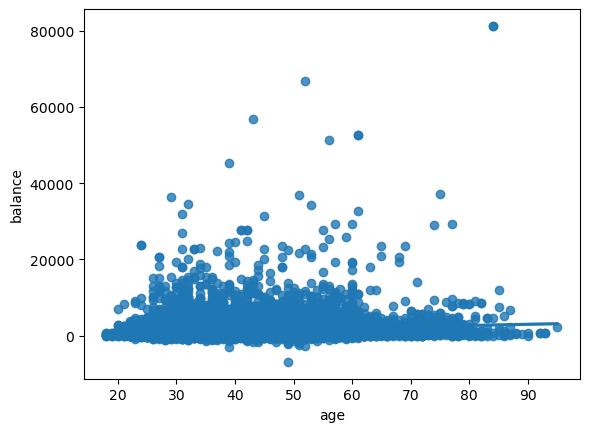

In [52]:
sns.regplot(data=df, x="age", y="balance") 

In [53]:
df[["age","balance"]].corr()

age  balance
age      1.0000   0.1123
balance  0.1123   1.0000

<Axes: xlabel='age', ylabel='duration'>

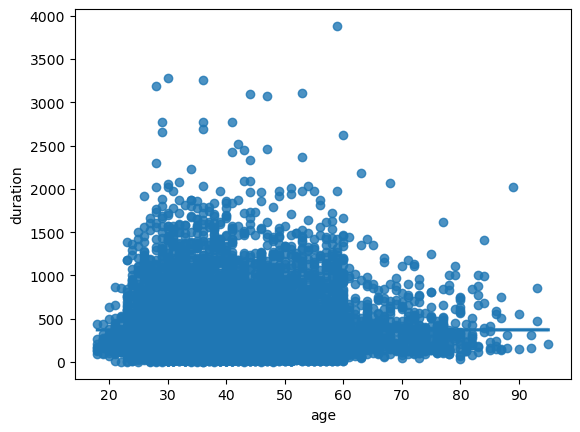

In [54]:
sns.regplot(data=df, x="age", y="duration") 

<Axes: xlabel='balance', ylabel='duration'>

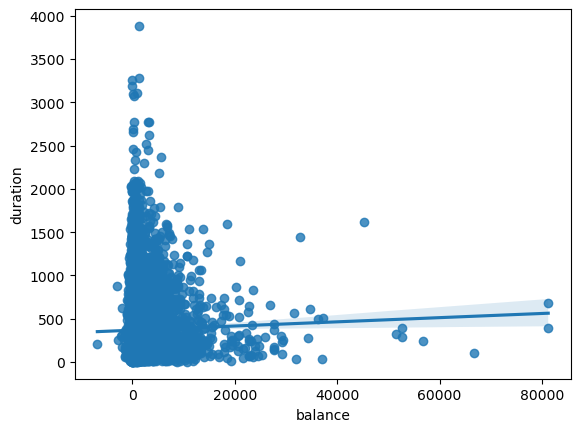

In [55]:
sns.regplot(data=df, x="balance", y="duration")

# missing value treatment

In [56]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
month           0
duration        0
campaign        0
previous        0
poutcome        0
deposit         0
recent_pdays    0
dtype: int64

- there is no missing value

# outlier treatment

<Axes: ylabel='age'>

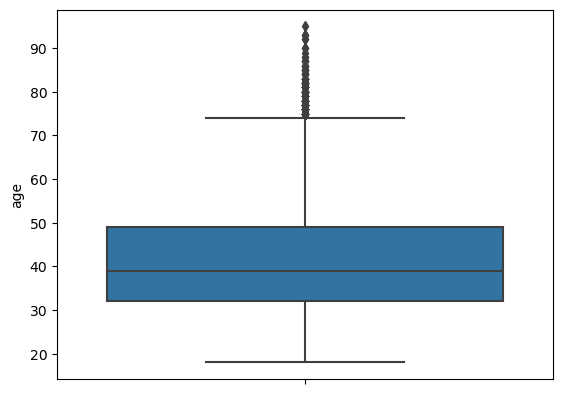

In [57]:
sns.boxplot(data=df, y="age")

### Tukey method to treat outliers

In [58]:
# # outliers exist outside these boundaries
# lower_side_boundary = Q1-1.5*(Q3-Q1)
# upper_side_boundary=Q3+1.5*(Q3-Q1)

# where Q1 = 25the percentile
# Q3= 75th percentile

# Q3-Q1 is interquartile range (IQR)

# if any value is less than lower_side_boundary then it is outlier
# If any value is higher than upper_side_boundary then it is outlier

In [59]:
def myoutlier(var):
    q1=var.quantile(.25)
    q3=var.quantile(.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    var=np.where(var>=upper_bound,upper_bound,var)
    var=np.where(var<=lower_bound,lower_bound,var)
    return var

In [64]:
df["age"]=myoutlier(df["age"])

<Axes: ylabel='age'>

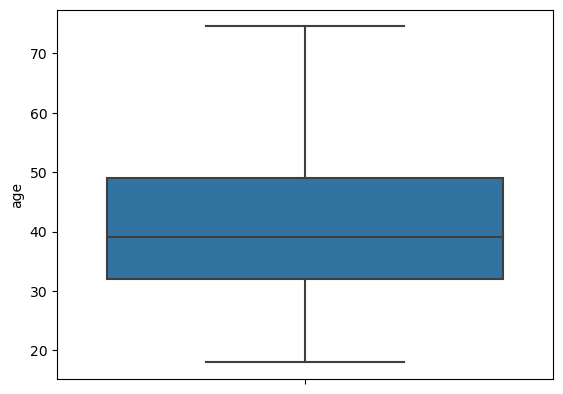

In [65]:
sns.boxplot(data=df, y="age")

In [66]:
df["balance"]=np.where(df["balance"]<=0, 0, df["balance"])

<Axes: ylabel='balance'>

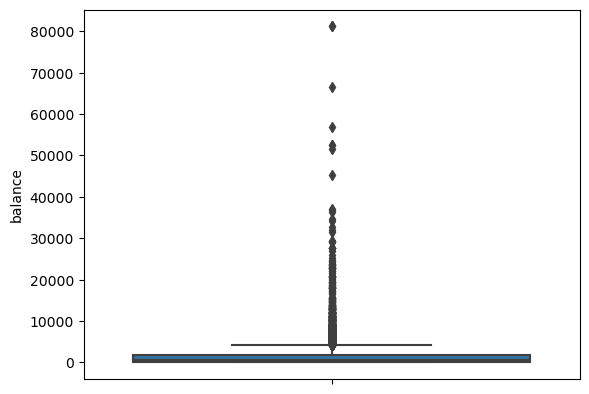

In [67]:
sns.boxplot(data=df,y="balance")

In [68]:
df["balance"]=myoutlier(df["balance"])

<Axes: ylabel='balance'>

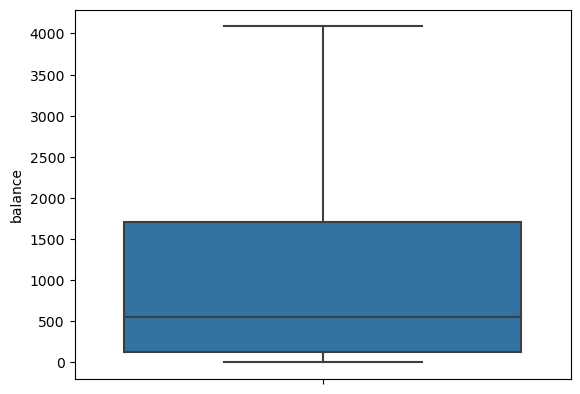

In [69]:
sns.boxplot(data=df,y="balance")

In [70]:
df.dtypes[df.dtypes!="object"].index

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'deposit',
       'recent_pdays'],
      dtype='object')

<Axes: ylabel='duration'>

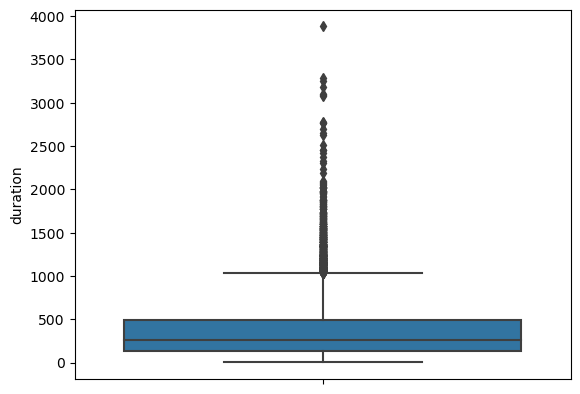

In [71]:
sns.boxplot(data=df,y="duration")

In [72]:
num_data=df[df.dtypes[df.dtypes!="object"].index]
cat_data=df[df.dtypes[df.dtypes=="object"].index]

In [73]:
num_data2=num_data.apply(myoutlier)

<Axes: ylabel='duration'>

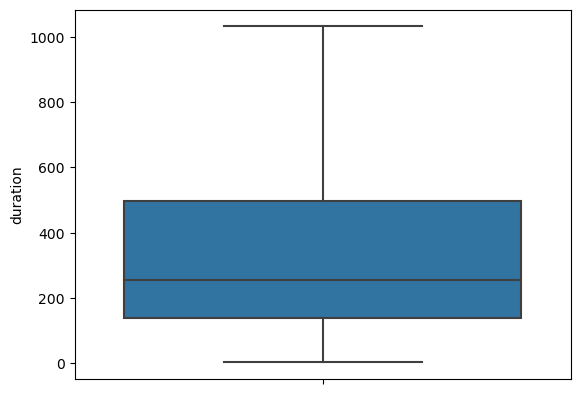

In [74]:
sns.boxplot(data=num_data2,y="duration")

In [75]:
df=pd.concat([cat_data,num_data2],axis=1)

## creating dummies

In [76]:
df1=pd.get_dummies(data=df,drop_first=True)

In [77]:
df1.head()

age  balance  duration  campaign  previous  deposit  recent_pdays  \
0  59.0   2343.0    1033.0       1.0       0.0      1.0      0.001001   
1  56.0     45.0    1033.0       1.0       0.0      1.0      0.001001   
2  41.0   1270.0    1033.0       1.0       0.0      1.0      0.001001   
3  55.0   2476.0     579.0       1.0       0.0      1.0      0.001001   
4  54.0    184.0     673.0       2.0       0.0      1.0      0.001001   

   job_Pink-collar  job_White-collar  job_blue-collar  ...  month_jan  \
0                0                 1                0  ...          0   
1                0                 1                0  ...          0   
2                0                 0                0  ...          0   
3                1                 0                0  ...          0   
4                0                 1                0  ...          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          1          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   month_sep  poutcome_other  poutcome_success  
0          0               1                 0  
1          0               1                 0  
2          0               1                 0  
3          0               1                 0  
4          0               1                 0  

[5 rows x 33 columns]

In [79]:
df1.shape

(11162, 33)

In [80]:
df1.isnull().sum()

age                    0
balance                0
duration               0
campaign               0
previous               0
deposit                0
recent_pdays           0
job_Pink-collar        0
job_White-collar       0
job_blue-collar        0
job_self-depend        0
job_technician         0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0
poutcome_success       0
dtype: int64

In [81]:
df1.dtypes

age                    float64
balance                float64
duration               float64
campaign               float64
previous               float64
deposit                float64
recent_pdays           float64
job_Pink-collar          uint8
job_White-collar         uint8
job_blue-collar          uint8
job_self-depend          uint8
job_technician           uint8
marital_married          uint8
marital_single           uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
default_yes              uint8
housing_yes              uint8
loan_yes                 uint8
month_aug                uint8
month_dec                uint8
month_feb                uint8
month_jan                uint8
month_jul                uint8
month_jun                uint8
month_mar                uint8
month_may                uint8
month_nov                uint8
month_oct                uint8
month_sep                uint8
poutcome_other           uint8
poutcome

# Model Development

In [82]:
df1.columns

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'deposit',
       'recent_pdays', 'job_Pink-collar', 'job_White-collar',
       'job_blue-collar', 'job_self-depend', 'job_technician',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [84]:
y=df1["deposit"]
x=df1.drop(columns=["deposit"])

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [86]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression(max_iter=1000)

In [87]:
logistic_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [88]:
logistic_model.score(x_train,y_train) #accuracy

0.8178676564699859

In [89]:
logistic_model.score(x_test,y_test) #accuracy

0.8154673036727381

In [90]:
pred_train=logistic_model.predict(x_train)

In [91]:
pred_test=logistic_model.predict(x_test)

In [92]:
from sklearn import metrics

In [93]:
cmtrain=metrics.confusion_matrix(y_train,pred_train)

pd.DataFrame(cmtrain,columns=["pred_0","pred_1"],index=["act_0","act_1"])

pred_0  pred_1
act_0    3462     619
act_1     804    2928

In [94]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      4081
         1.0       0.83      0.78      0.80      3732

    accuracy                           0.82      7813
   macro avg       0.82      0.82      0.82      7813
weighted avg       0.82      0.82      0.82      7813



In [95]:
cmtest=metrics.confusion_matrix(y_test,pred_test)
pd.DataFrame(cmtest,columns=["pred_0","pred_1"],index=["act_0","act_1"])

pred_0  pred_1
act_0    1513     279
act_1     339    1218

In [96]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      1792
         1.0       0.81      0.78      0.80      1557

    accuracy                           0.82      3349
   macro avg       0.82      0.81      0.81      3349
weighted avg       0.82      0.82      0.82      3349



## decision tree

In [97]:
dt=DecisionTreeClassifier()

In [98]:
dt.fit(x_train,y_train)
print("train accuracy: ",round(dt.score(x_train,y_train),3))
print("test accuracy: ",round(dt.score(x_test,y_test),3))


train accuracy:  1.0
test accuracy:  0.762


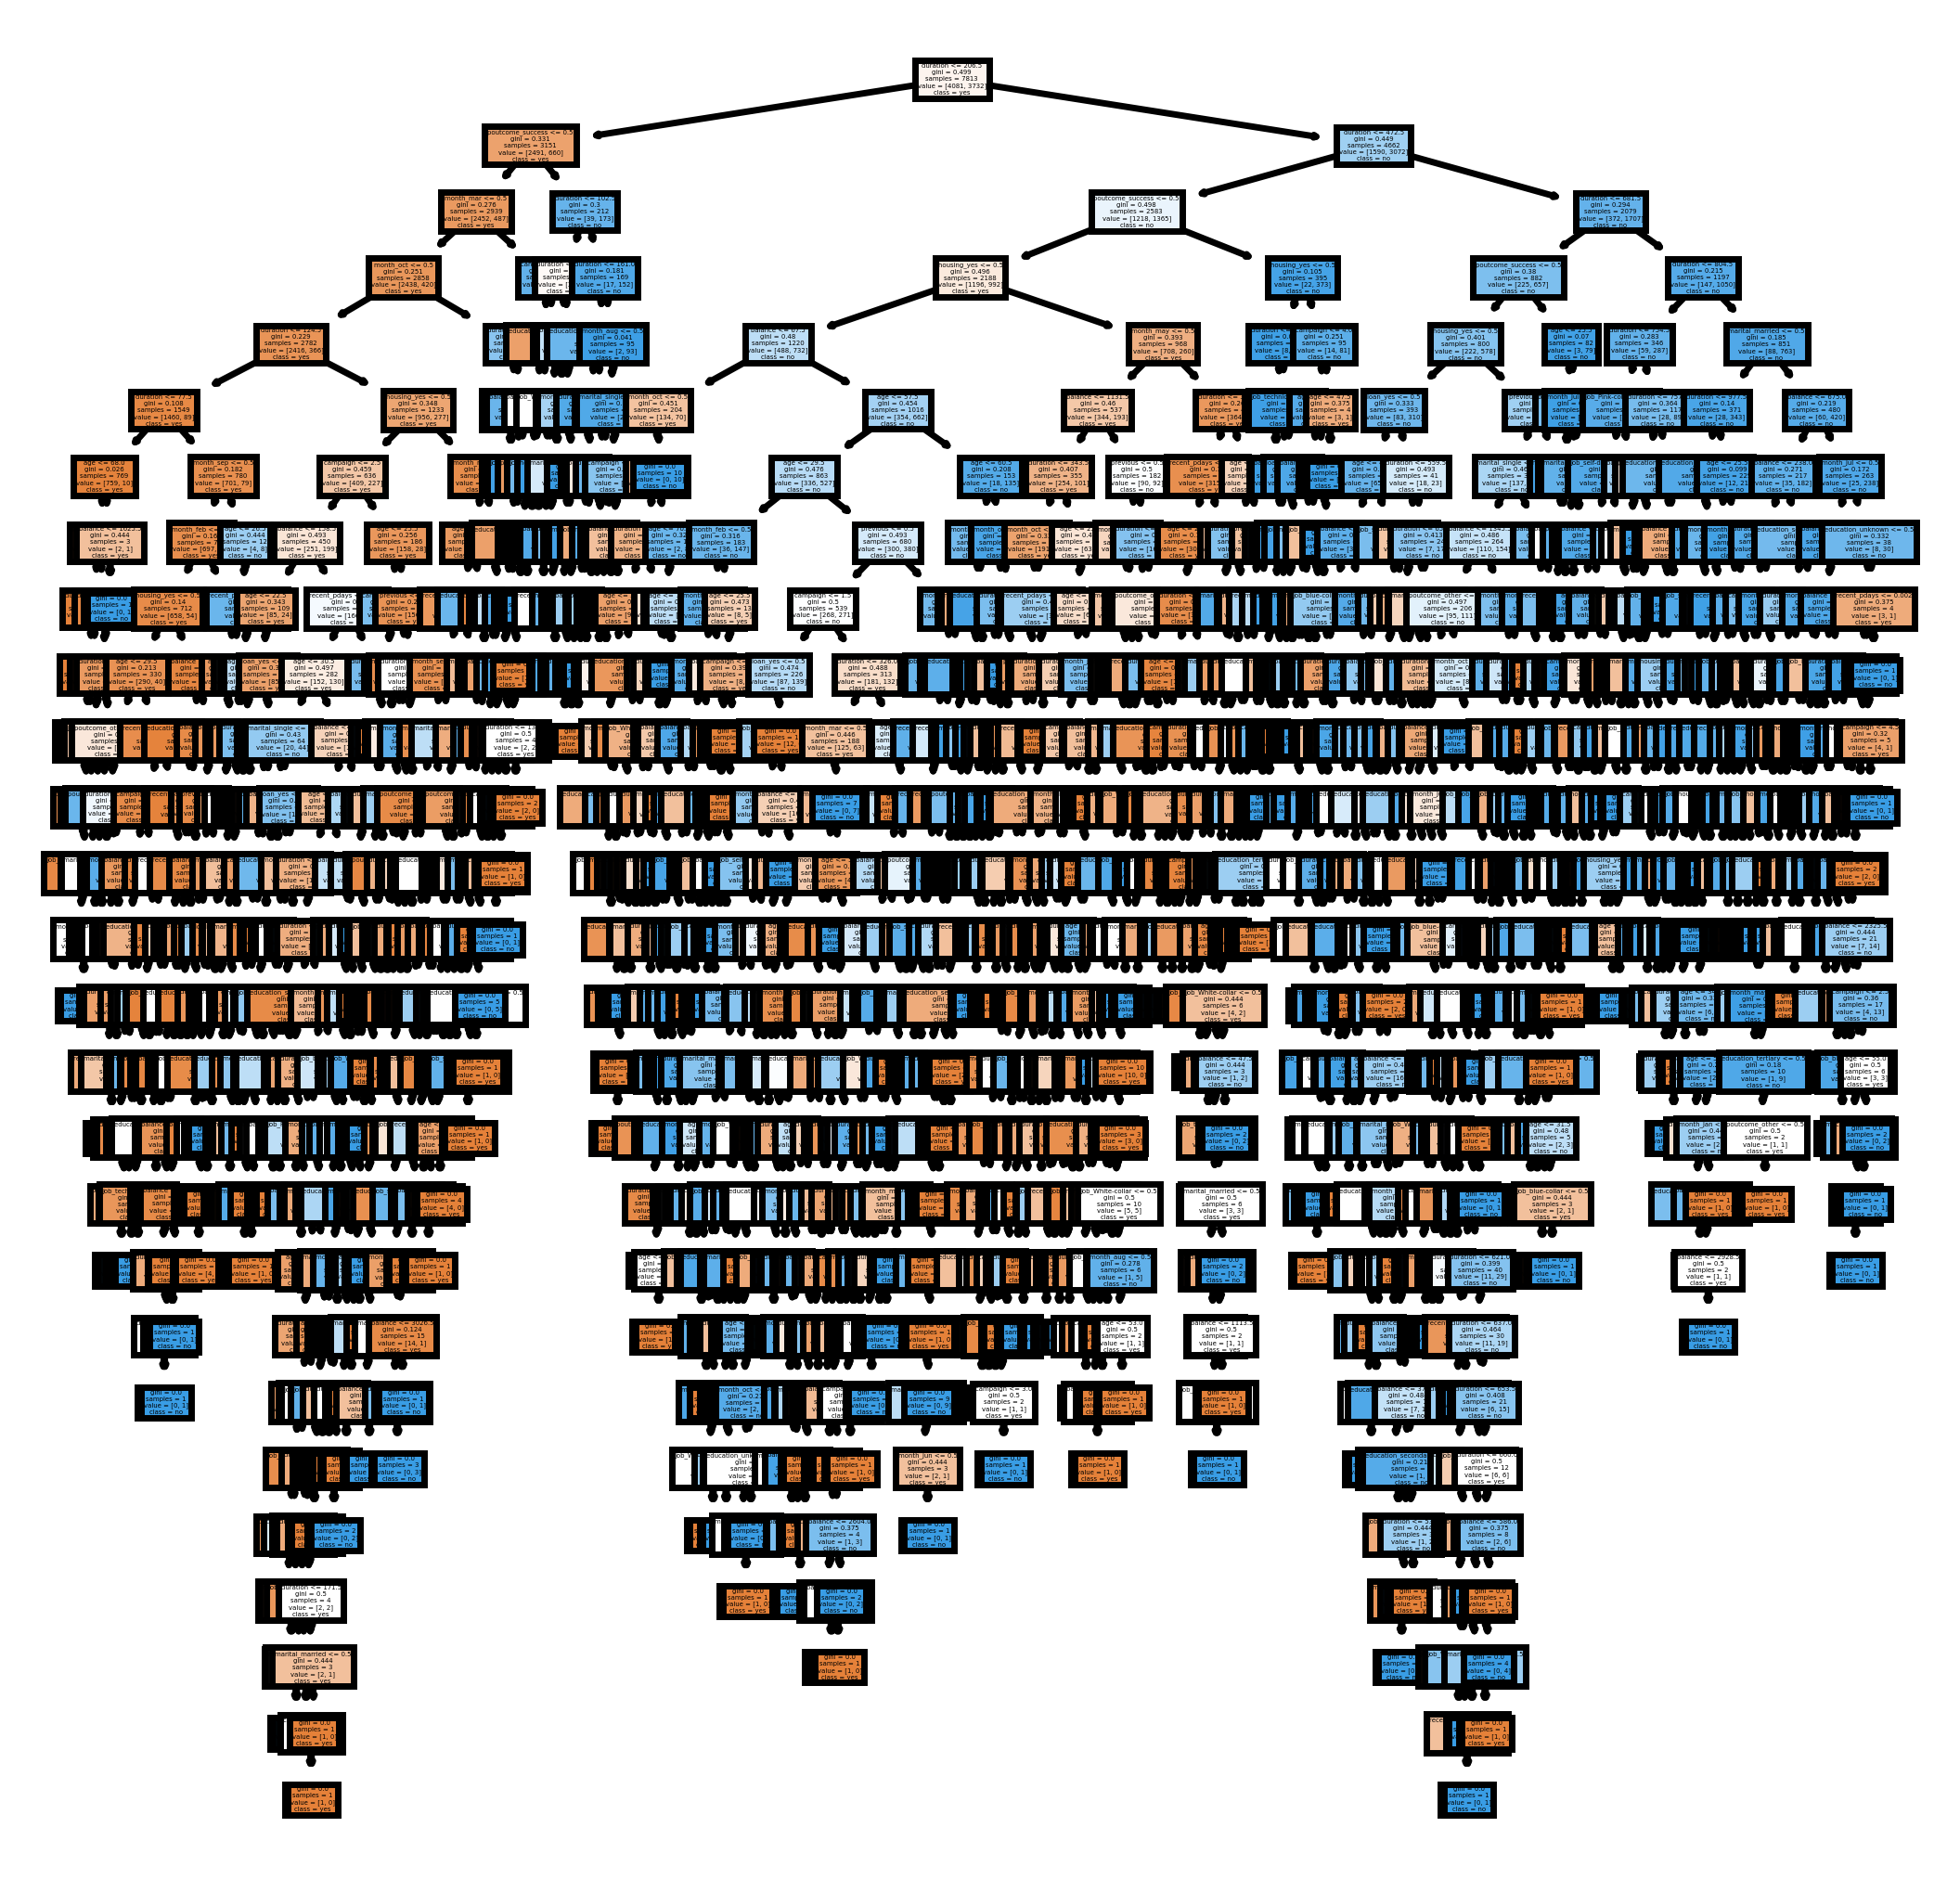

In [100]:
from sklearn.tree import plot_tree
fn=x_train.columns.to_list()
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)

dt_plot=plot_tree(dt,feature_names = fn,
                  class_names=cn,
                  filled = True);

***
* Our model is overfitting as train results are far better than test
* To avoid overfitting : 
        make model simple ( control the parameters)
        Cross Validation 
***

In [102]:
dt1=DecisionTreeClassifier(max_depth=7)
dt1.fit(x_train,y_train)
print("train accuracy: ",round(dt1.score(x_train,y_train),3))
print("test accuracy: ",round(dt1.score(x_test,y_test),3))


train accuracy:  0.82
test accuracy:  0.8


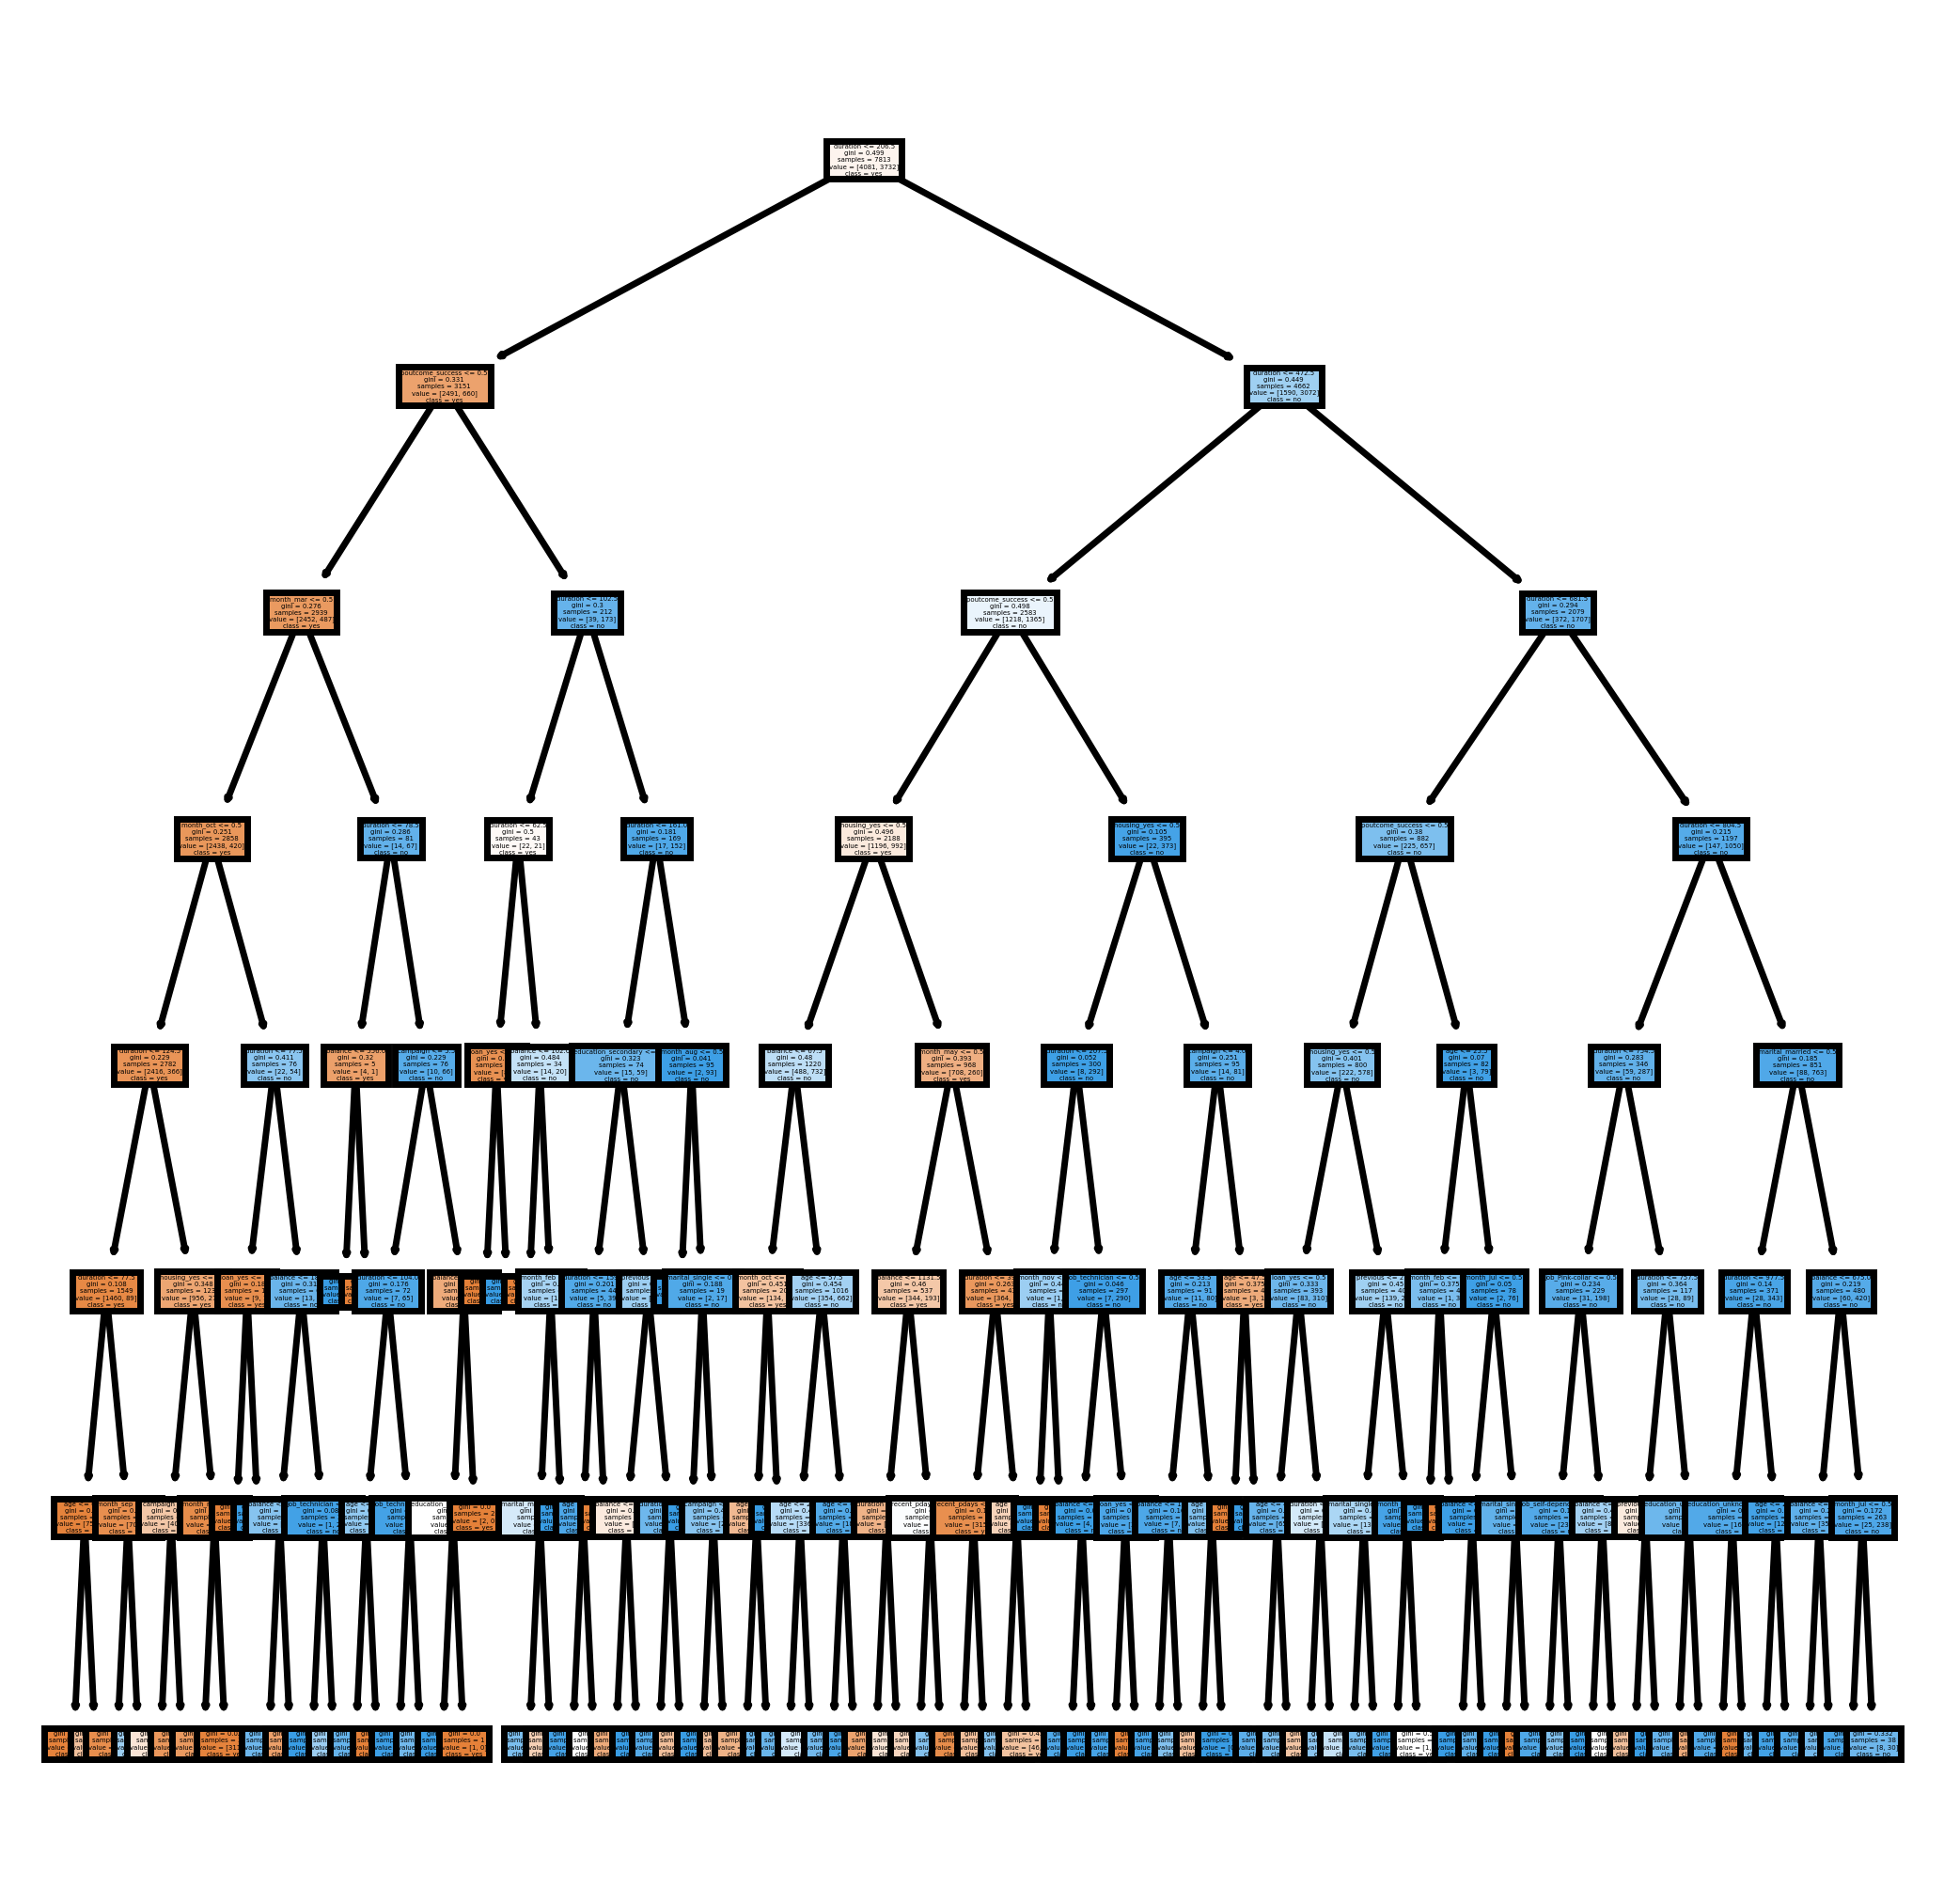

In [103]:
from sklearn.tree import plot_tree
fn=x_train.columns.to_list()
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)

dt_plot=plot_tree(dt1,feature_names = fn,
                  class_names=cn,
                  filled = True);

In [104]:
dt2=DecisionTreeClassifier(min_samples_split=200)
dt2.fit(x_train,y_train)
print("train accuracy: ",round(dt2.score(x_train,y_train),3))
print("test accuracy: ",round(dt2.score(x_test,y_test),3))

train accuracy:  0.829
test accuracy:  0.807


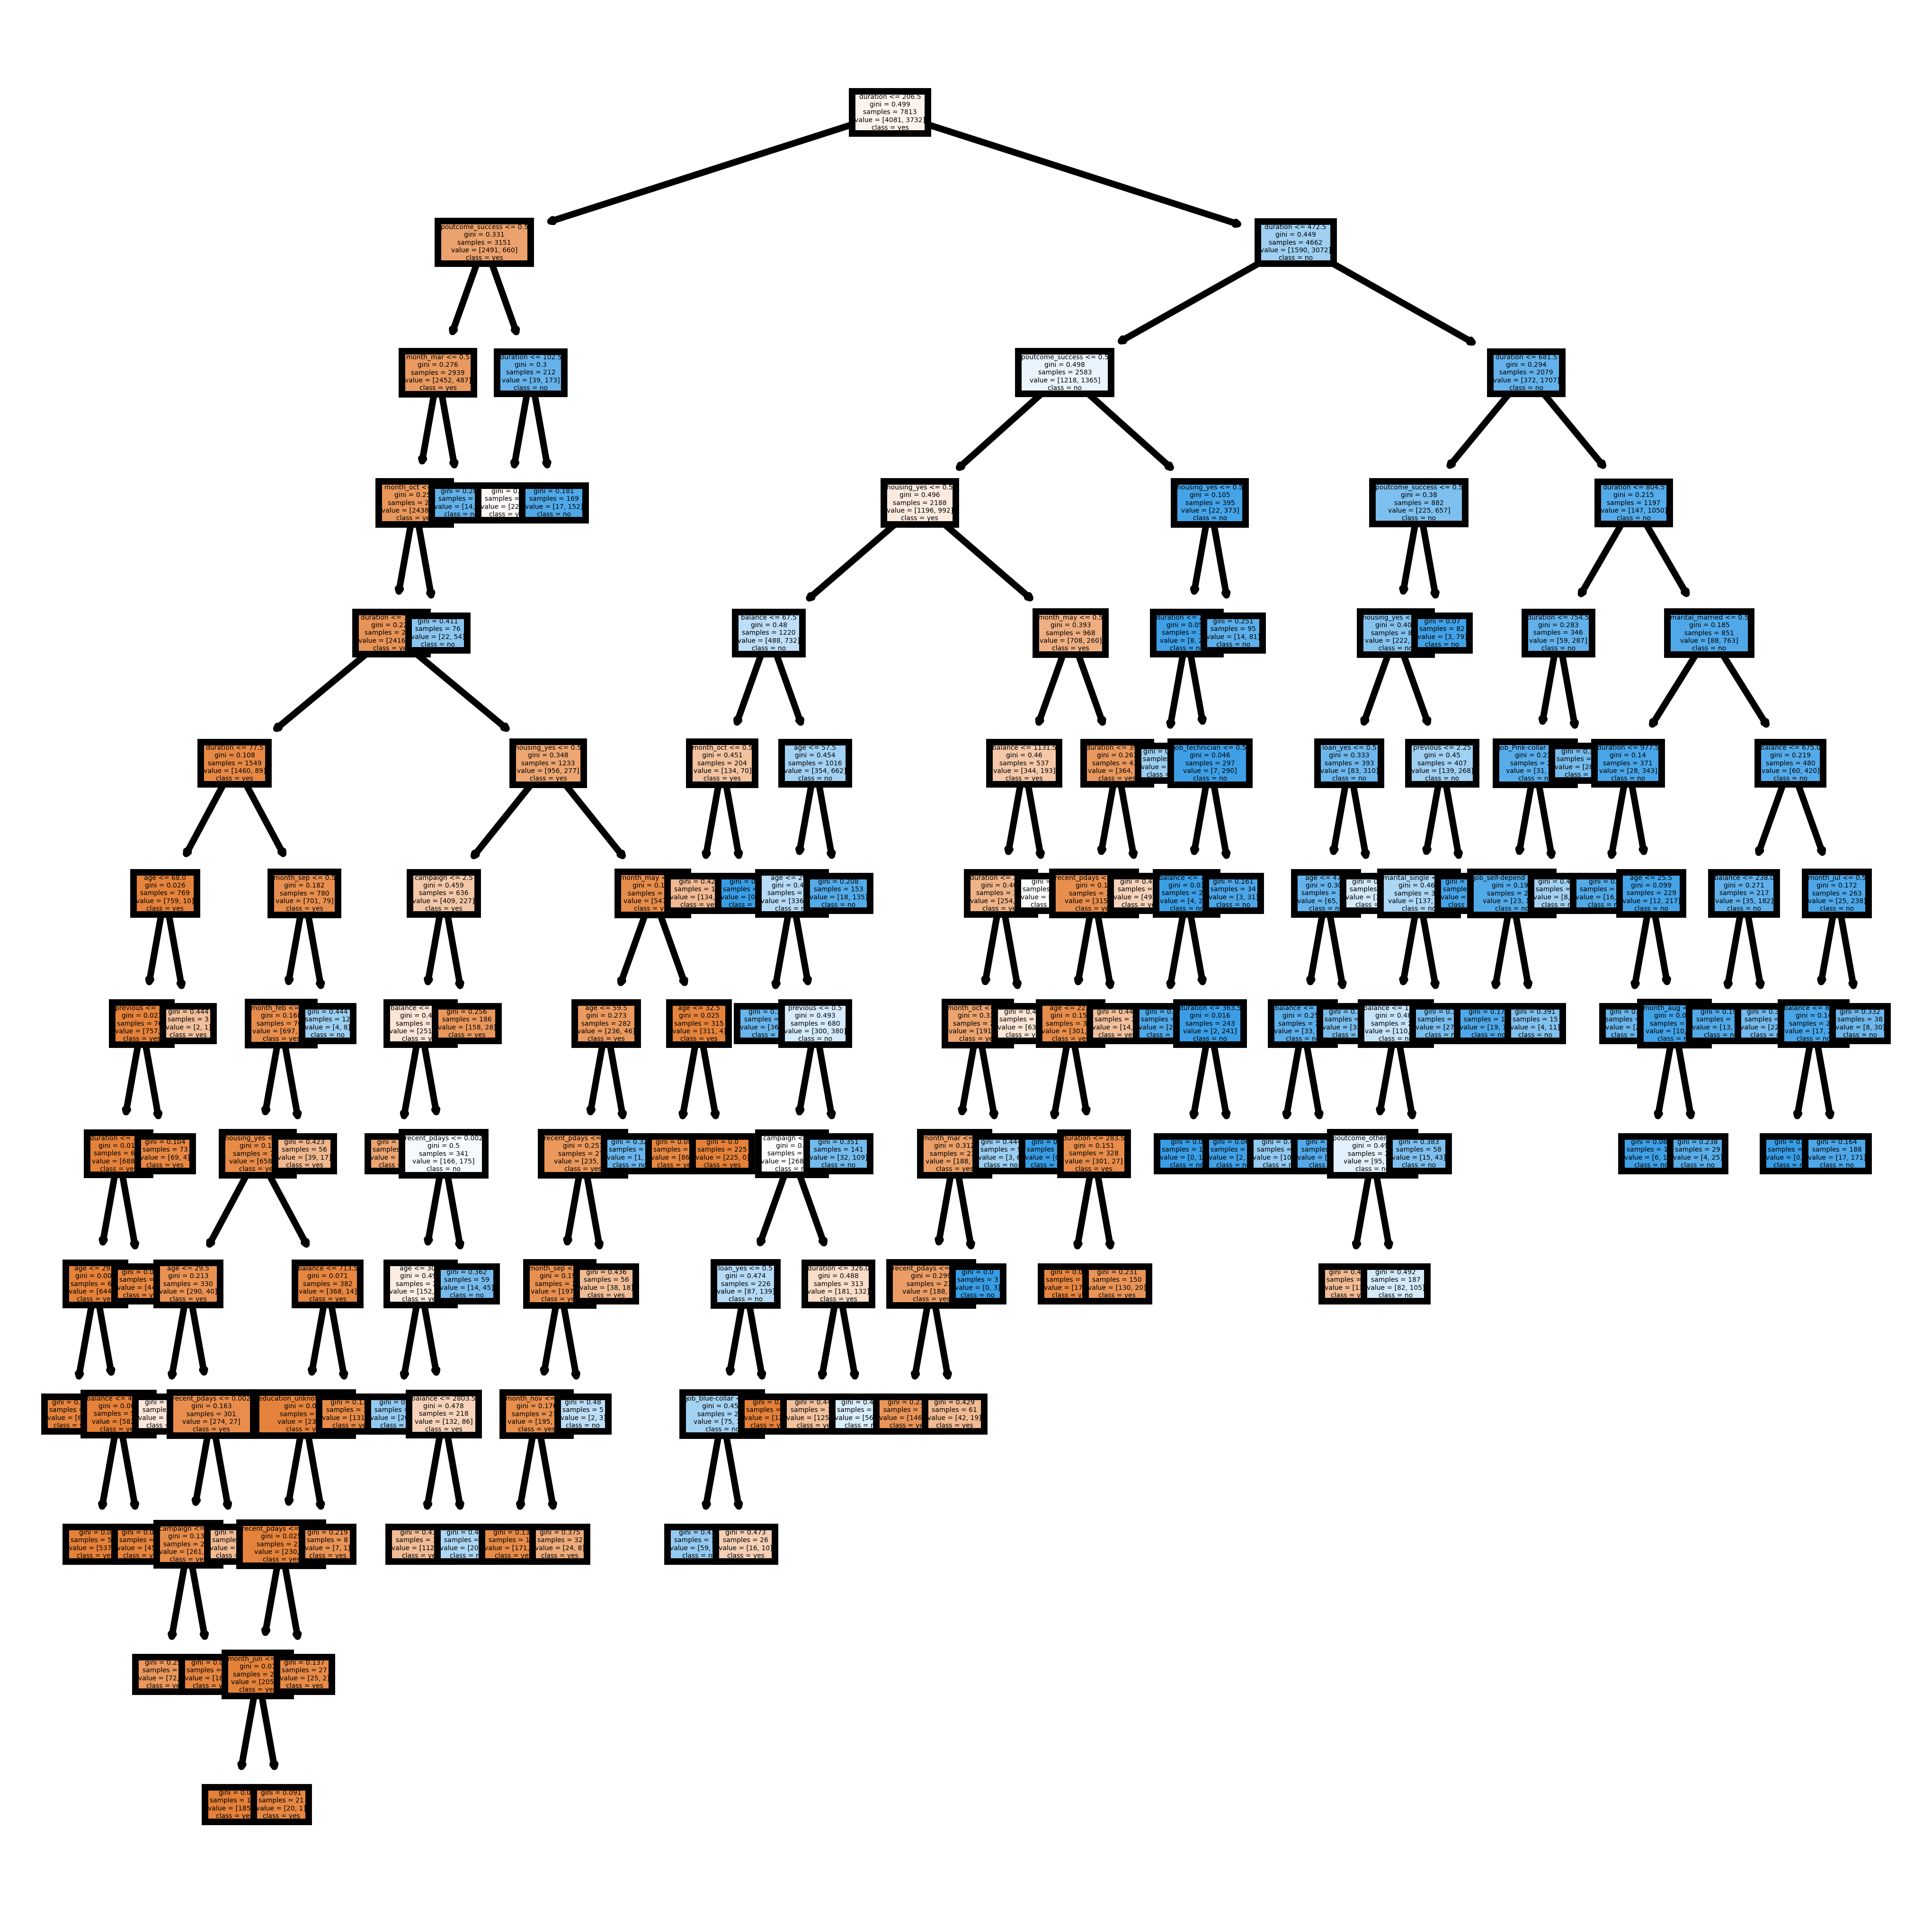

In [105]:
from sklearn.tree import plot_tree
fn=x_train.columns.to_list()
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)

dt_plot=plot_tree(dt2,feature_names = fn,
                  class_names=cn,
                  filled = True);

In [106]:
dt3=DecisionTreeClassifier(min_samples_leaf=50)
dt3.fit(x_train,y_train)
print("train accuracy: ",round(dt3.score(x_train,y_train),3))
print("test accuracy: ",round(dt3.score(x_test,y_test),3))

train accuracy:  0.829
test accuracy:  0.811


In [107]:
dt1=DecisionTreeClassifier(criterion="gini")
dt1.fit(x_train, y_train)
print("train accuracy: ",round(dt1.score(x_train,y_train),3))
print("test accuracy: ",round(dt1.score(x_test,y_test),3))

train accuracy:  1.0
test accuracy:  0.761


In [108]:
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train, y_train)
print("train accuracy: ",round(dt1.score(x_train,y_train),3))
print("test accuracy: ",round(dt1.score(x_test,y_test),3))

train accuracy:  1.0
test accuracy:  0.762


## Grid search: parameter tuning

In [110]:
from sklearn.model_selection import GridSearchCV

params={
    "criterion":["gini", "entropy"],
"max_depth": [5,7,9,10,11],
"min_samples_split" :[10,15,20,50,100,200,250],
"min_samples_leaf" : [5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier(random_state=0)
gd_search=GridSearchCV(estimator=dtg,param_grid=params , cv=10, n_jobs=2)
gd_search.fit(x_train, y_train) 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 10, 11],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200, 250]})

In [111]:
gd_search.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 100}

In [112]:
gd_search.best_score_

0.8108302687550554

In [113]:
gd_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=5,
                       min_samples_split=100, random_state=0)

In [114]:
dt_f=DecisionTreeClassifier(criterion="entropy",max_depth=11,min_samples_leaf=5,min_samples_split=100)
dt_f.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=5,
                       min_samples_split=100)

In [115]:
print("train accuracy: ",round(dt_f.score(x_train,y_train),3))
print("test accuracy: ",round(dt_f.score(x_test,y_test),3))

train accuracy:  0.836
test accuracy:  0.814


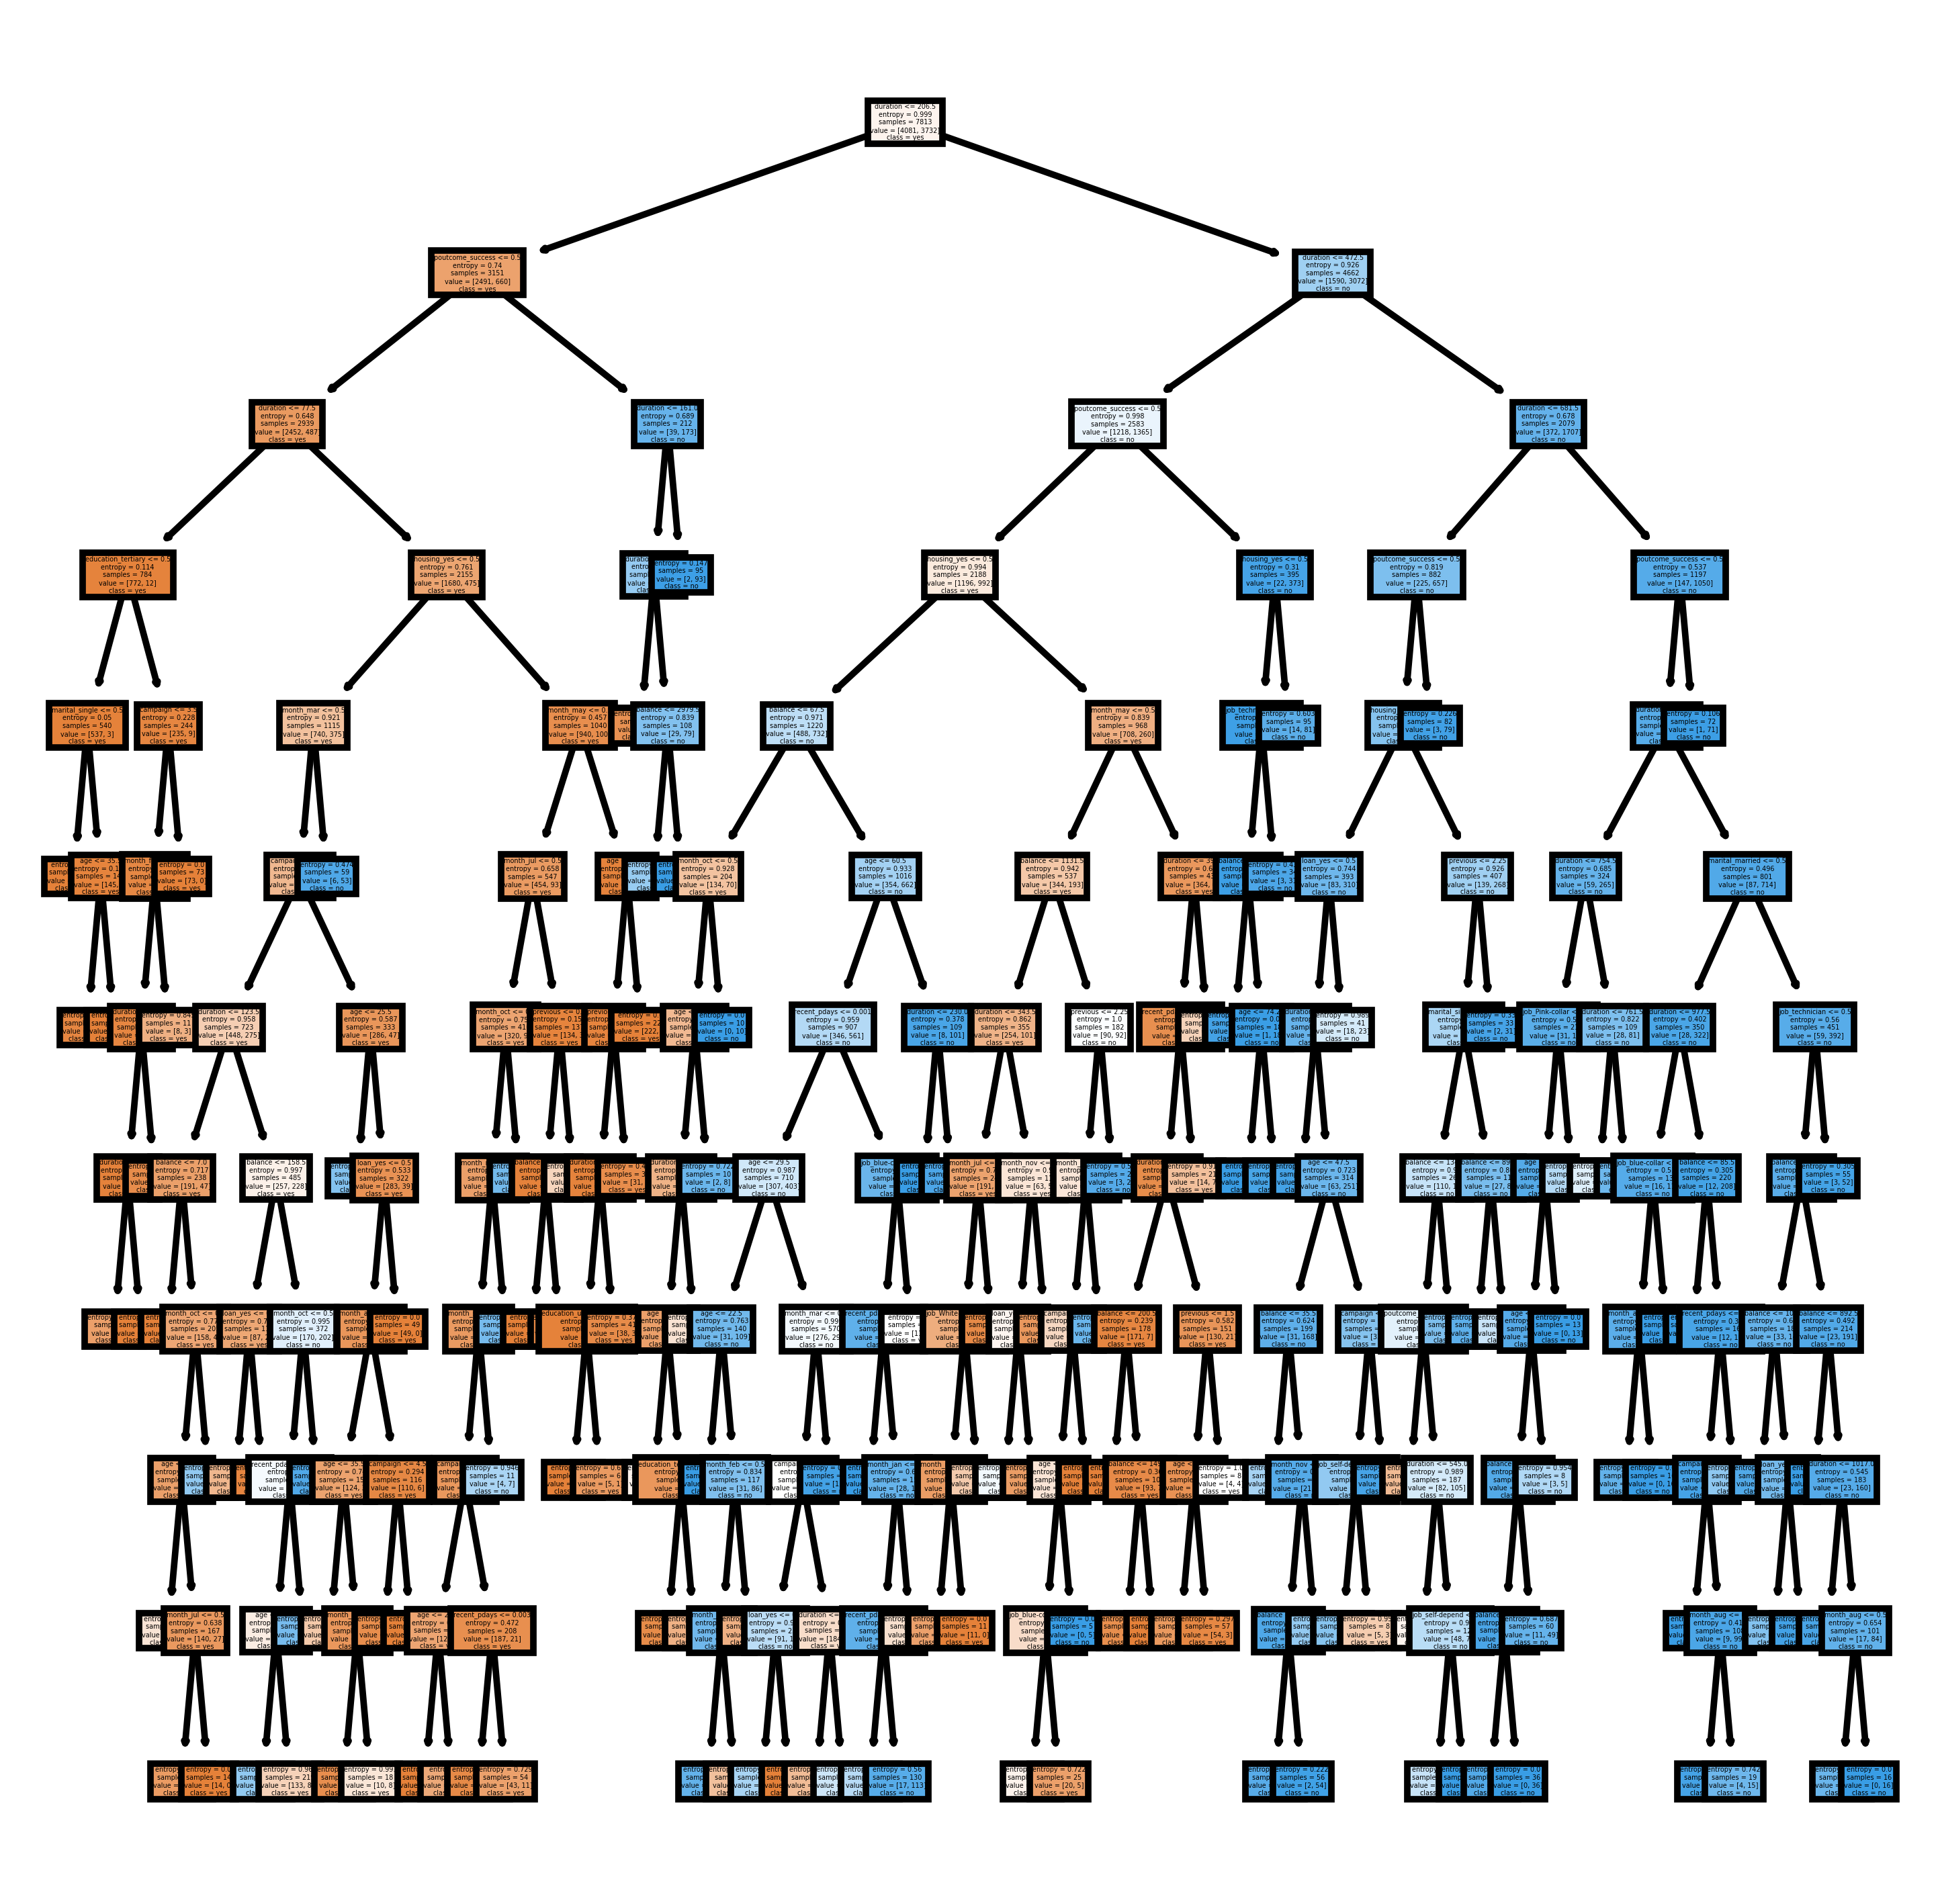

In [116]:
from sklearn.tree import plot_tree
fn=x_train.columns.to_list()
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=700)

dt_plot=plot_tree(dt_f,
           feature_names = fn, 
           class_names=cn,
           filled = True)

## feature importance

In [117]:
dt_f.feature_importances_

array([0.0414931 , 0.04526677, 0.48800671, 0.02472913, 0.01027035,
       0.01730526, 0.00152943, 0.00145549, 0.00460558, 0.00204005,
       0.00143685, 0.00100499, 0.00335217, 0.        , 0.00316366,
       0.00133038, 0.        , 0.08753096, 0.01367549, 0.00581037,
       0.        , 0.00710019, 0.00280565, 0.01032553, 0.        ,
       0.0250211 , 0.02585203, 0.00297872, 0.01515024, 0.00233844,
       0.0007882 , 0.15363314])

In [118]:
feat_imp=pd.DataFrame({"variable":x_train.columns,
                      "imp":dt_f.feature_importances_}).sort_values(by="imp",ascending=False)

In [119]:
feat_imp

variable       imp
2              duration  0.488007
31     poutcome_success  0.153633
17          housing_yes  0.087531
1               balance  0.045267
0                   age  0.041493
26            month_may  0.025852
25            month_mar  0.025021
3              campaign  0.024729
5          recent_pdays  0.017305
28            month_oct  0.015150
18             loan_yes  0.013675
23            month_jul  0.010326
4              previous  0.010270
21            month_feb  0.007100
19            month_aug  0.005810
8       job_blue-collar  0.004606
12       marital_single  0.003352
14   education_tertiary  0.003164
27            month_nov  0.002979
22            month_jan  0.002806
29            month_sep  0.002338
9       job_self-depend  0.002040
6       job_Pink-collar  0.001529
7      job_White-collar  0.001455
10       job_technician  0.001437
15    education_unknown  0.001330
11      marital_married  0.001005
30       poutcome_other  0.000788
24            month_jun  0.000000
20            month_dec  0.000000
13  education_secondary  0.000000
16          default_yes  0.000000

<Axes: xlabel='variable', ylabel='imp'>

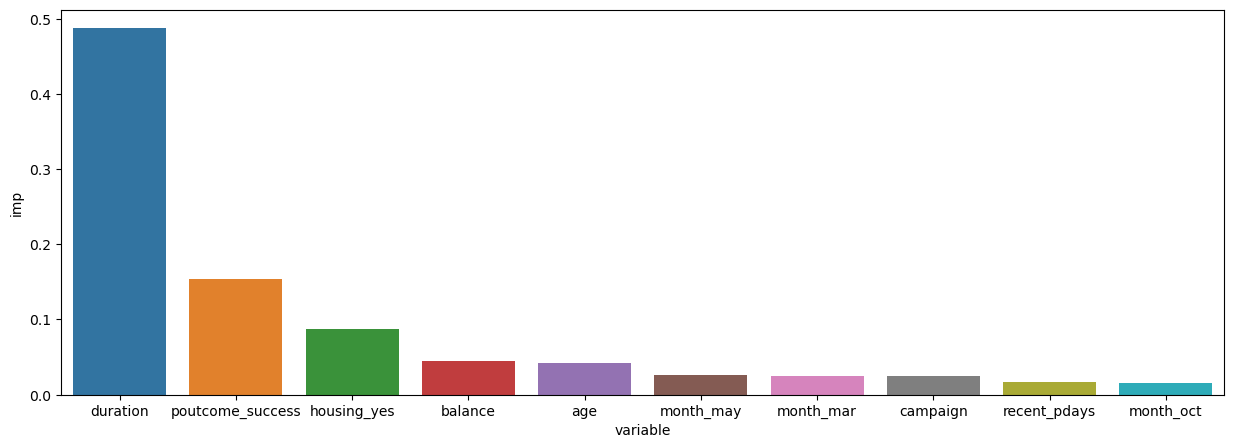

In [120]:
plt.figure(figsize=(15,5))
sns.barplot(data=feat_imp.head(10), x="variable", y="imp")

In [121]:
feat_imp[feat_imp["imp"]>=0.01]["variable"].unique()

array(['duration', 'poutcome_success', 'housing_yes', 'balance', 'age',
       'month_may', 'month_mar', 'campaign', 'recent_pdays', 'month_oct',
       'loan_yes', 'month_jul', 'previous'], dtype=object)

In [122]:
x_train1=x_train[['duration', 'poutcome_success', 'housing_yes', 'balance', 'age',
       'month_may', 'month_mar', 'campaign', 'recent_pdays', 'month_oct',
       'loan_yes', 'month_jul', 'previous']]

x_test1=x_test[['duration', 'poutcome_success', 'housing_yes', 'balance', 'age',
       'month_may', 'month_mar', 'campaign', 'recent_pdays', 'month_oct',
       'loan_yes', 'month_jul', 'previous']]

In [123]:
dt_f=DecisionTreeClassifier(criterion="entropy",max_depth=11,min_samples_leaf=5,min_samples_split=100)

dt_f.fit(x_train1, y_train)
print("Train Accuracy : ", round(dt_f.score(x_train1, y_train),3))
print("Test Accuracy :",round(dt_f.score(x_test1, y_test),3))

Train Accuracy :  0.837
Test Accuracy : 0.81


In [124]:
pred_train=dt_f.predict(x_train1)
pred_test=dt_f.predict(x_test1)

In [125]:
pd.DataFrame(dt_f.predict_proba(x_train1), columns=["Porb_0", "Prob_1"])


Porb_0    Prob_1
0     0.823529  0.176471
1     0.151515  0.848485
2     0.052632  0.947368
3     0.326633  0.673367
4     0.981132  0.018868
...        ...       ...
7808  0.200000  0.800000
7809  0.000000  1.000000
7810  1.000000  0.000000
7811  0.758389  0.241611
7812  0.000000  1.000000

[7813 rows x 2 columns]

In [126]:
prob_train_1=dt_f.predict_proba(x_train1)[:,1]  #Prob of 1 
prob_test_1=dt_f.predict_proba(x_test1)[:,1]

In [127]:
def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    auc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy":ac1, "Recall":rc1, "Precision":pc1, "F1 score":f1, "AUC":auc1}
    fpr, tpr, threshold=metrics.roc_curve(act,probs )
    plt.plot([0,1],[0,1],'k--', label="AUC: "+str(auc1))
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend()
    plt.show()
    return result

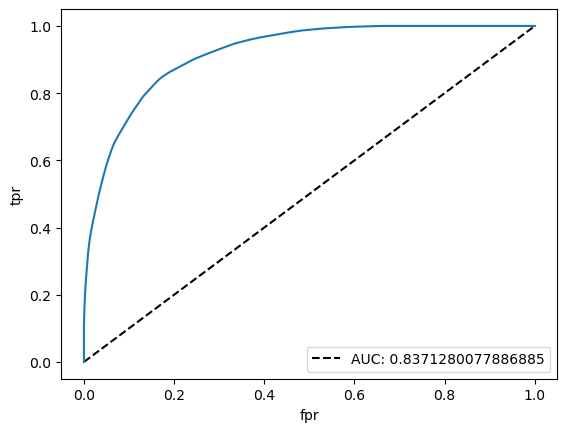

{'Accuracy': 0.8369384359400999,
 'Recall': 0.8413719185423365,
 'Precision': 0.8215593929879644,
 'F1 score': 0.831347630394493,
 'AUC': 0.8371280077886885}

In [128]:
classification_eva(y_train, pred_train, probs=prob_train_1)

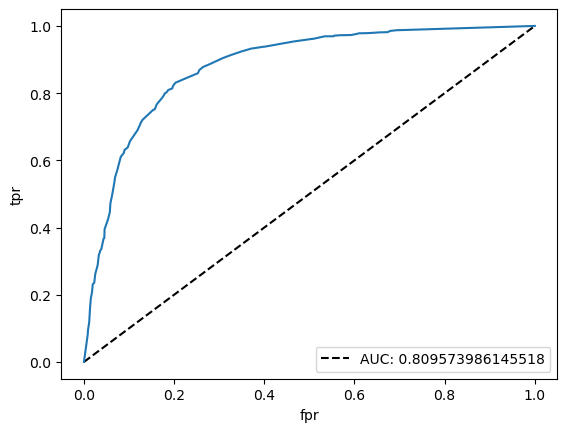

{'Accuracy': 0.8100925649447597,
 'Recall': 0.8021836865767502,
 'Precision': 0.7920101458465441,
 'F1 score': 0.7970644543714103,
 'AUC': 0.809573986145518}

In [129]:
classification_eva(y_test, pred_test, probs=prob_test_1)
